In [1]:
import pandas as pd

In [2]:
food_trade_df =  pd.read_csv('/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')

In [3]:
food_trade_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [4]:
food_trade_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [5]:
food_trade_df['Item'].unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

In [6]:
# Correct the DataFrame filtering with .copy() to ensure it's a new DataFrame not a view
filtered_food_trade = food_trade_df[
    (food_trade_df['Element'] == 'Export Value') &
    (food_trade_df['Item'].isin(['Cereals and Preparations', 'Fats and Oils (excluding Butter)', 
                                 'Sugar and Honey', 'Fruit and Vegetables', 'Tobacco'])
)].copy()

# Use .loc to safely create a new column or modify an existing one
filtered_food_trade.loc[:, 'Export Value (USD)'] = filtered_food_trade['Value'] * 1000

# Group by 'Year' and 'Area', and sum the export values to get total export value per year per area
total_export_value = filtered_food_trade.groupby(['Year', 'Area','Area Code (M49)'])['Export Value (USD)'].sum().reset_index()

# Display the first 10 rows to check the data
total_export_value.head(10)
##For each country each year total export value in USD 

,Year,Area,Area Code (M49),Export Value (USD)
0,1991,Afghanistan,4,5.185800e+07
1,1991,Albania,8,1.795500e+07
2,1991,Algeria,12,2.868600e+07
3,1991,Angola,24,0.000000e+00
4,1991,Antigua and Barbuda,28,1.000000e+06
5,1991,Argentina,32,3.393242e+09
6,1991,Australia,36,3.360572e+09
7,1991,Austria,40,4.501220e+08
8,1991,Bahamas,44,3.153000e+06
9,1991,Bahrain,48,6.263000e+06


In [7]:
total_export_value.shape

(6099, 4)

In [8]:
total_export_value.isnull().sum()

Year                  0
Area                  0
Area Code (M49)       0
Export Value (USD)    0
dtype: int64

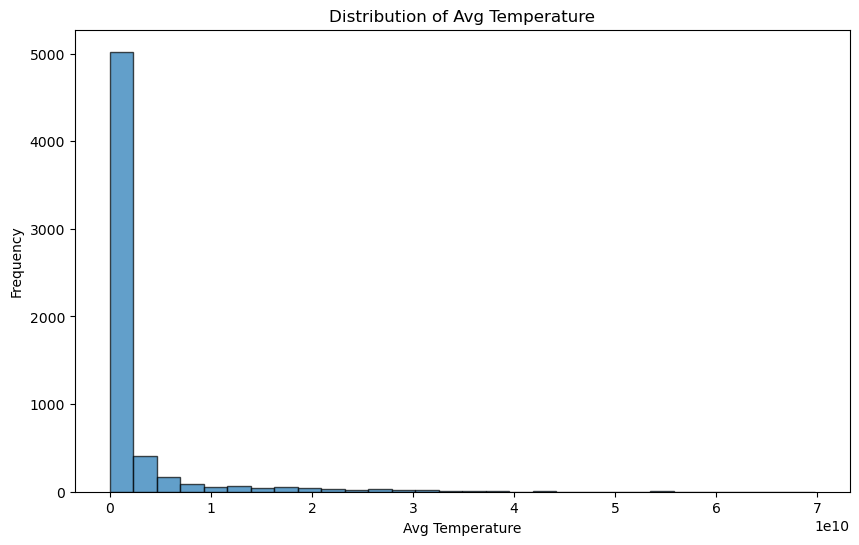

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(total_export_value['Export Value (USD)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Avg Temperature')
plt.xlabel('Avg Temperature')
plt.ylabel('Frequency')
plt.show()


In [10]:
temperature_use_df = pd.read_csv('/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Land temperature change - FAOSTAT_data_en_2-27-2024.csv')

In [11]:
temperature_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [12]:
temperature_use_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [13]:
 temperature_use_df = temperature_use_df[['Area Code (M49)', 'Area', 'Year', 'Value']]

In [14]:
temperature_use_df.head()

,Area Code (M49),Area,Year,Value
0,4,Afghanistan,2000,0.618
1,4,Afghanistan,2001,0.365
2,4,Afghanistan,2002,1.655
3,4,Afghanistan,2003,0.997
4,4,Afghanistan,2004,1.883


In [15]:
# Group by 'Area' and 'Year', then calculate the mean value for each group
temperature_use_df = temperature_use_df.groupby(['Area', 'Year','Area Code (M49)'])['Value'].mean().reset_index()
temperature_use_df = temperature_use_df.rename(columns={'Value': 'Avg_temperature'})

In [16]:
# Display the first few rows of the grouped and averaged dataframe
temperature_use_df.head()

,Area,Year,Area Code (M49),Avg_temperature
0,Afghanistan,2000,4,0.9128
1,Afghanistan,2001,4,1.0718
2,Afghanistan,2002,4,1.0988
3,Afghanistan,2003,4,0.7098
4,Afghanistan,2004,4,1.1029


In [17]:
temperature_use_df['Year'].value_counts()

Year
2011    240
2012    239
2021    239
2020    239
2019    239
2018    239
2017    239
2016    239
2015    239
2014    239
2013    239
2022    239
2010    238
2009    238
2008    238
2007    238
2006    238
2001    237
2005    237
2004    237
2003    237
2002    237
2000    237
Name: count, dtype: int64

In [18]:
# temperature_use_df

In [19]:
temperature_use_df.shape

(5481, 4)

In [20]:
temperature_use_df.isnull().sum()

Area                 0
Year                 0
Area Code (M49)      0
Avg_temperature    213
dtype: int64

In [21]:
temperature_use_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

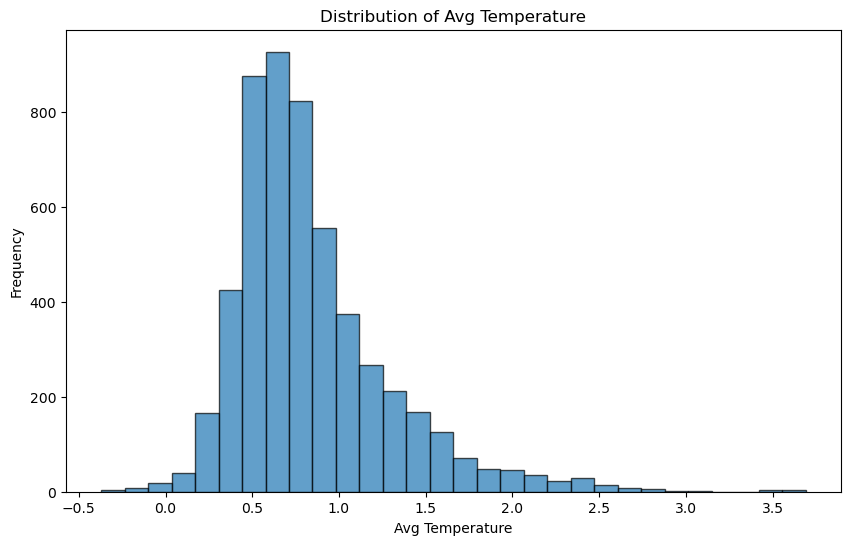

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(temperature_use_df['Avg_temperature'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Avg Temperature')
plt.xlabel('Avg Temperature')
plt.ylabel('Frequency')
plt.show()


In [23]:
temperature_use_df.shape

(5481, 4)

In [24]:
CPI= '/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv'
CPI_df = pd.read_csv(CPI)

In [25]:
CPI_df['Item'].unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

In [26]:
# Filter data for 'Food price Inflation'
#consumer_price_indicators_df['Item'].unique()
food_inflation = CPI_df[CPI_df['Item'] == 'Food price inflation']
#food_inflation_data.head(5)
avg_inflation=food_inflation.groupby(['Year','Area','Area Code (M49)'])['Value'].mean().reset_index()
avg_inflation.rename(columns={
    'Value': 'Average inflation'}, inplace=True)
avg_inflation.head(10) ####--we need this--food inflation average value

,Year,Area,Area Code (M49),Average inflation
0,2001,Afghanistan,4,12.780692
1,2001,Albania,8,4.060863
2,2001,Algeria,12,4.573801
3,2001,Andorra,20,4.500643
4,2001,Angola,24,119.811108
5,2001,Anguilla,660,4.023406
6,2001,Antigua and Barbuda,28,1.741974
7,2001,Argentina,32,-1.906310
8,2001,Armenia,51,3.634929
9,2001,Aruba,533,4.093796


In [27]:
avg_inflation.shape

(4653, 4)

In [28]:
avg_inflation.isnull().sum()

Year                 0
Area                 0
Area Code (M49)      0
Average inflation    0
dtype: int64

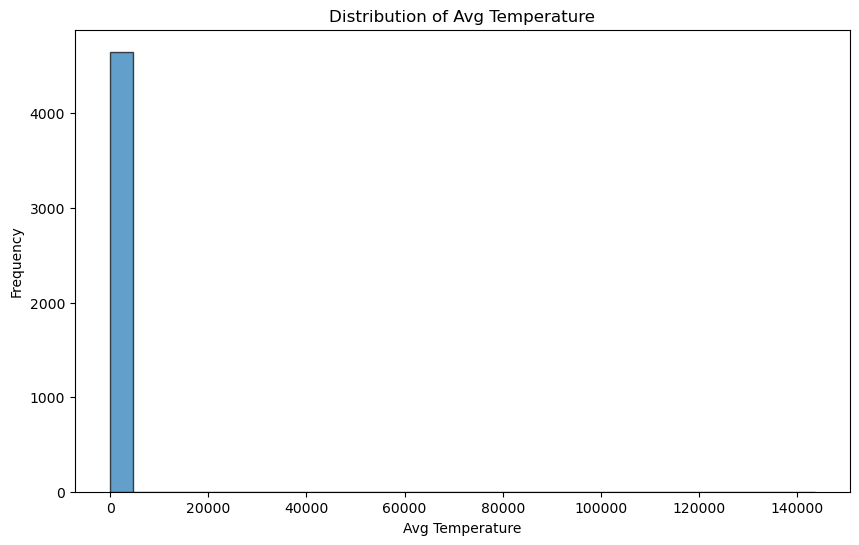

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(avg_inflation['Average inflation'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Avg Temperature')
plt.xlabel('Avg Temperature')
plt.ylabel('Frequency')
plt.show()


In [30]:
crop_production_indicators='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv'
crop_production_indicators_df=pd.read_csv(crop_production_indicators)
#crop_production_indicators_df.head(10)

In [31]:
average_yield=crop_production_indicators_df.groupby(['Year','Area','Area Code (M49)'])['Value'].mean().reset_index()

average_yield.rename(columns={
    'Value': 'Average Yield'}, inplace=True)
average_yield.head(10)

,Year,Area,Area Code (M49),Average Yield
0,2000,Afghanistan,4,60177.909091
1,2000,Albania,8,85900.272727
2,2000,Algeria,12,46022.000000
3,2000,Angola,24,65443.181818
4,2000,Antigua and Barbuda,28,29795.500000
5,2000,Argentina,32,140411.090909
6,2000,Armenia,51,69044.125000
7,2000,Australia,36,167304.909091
8,2000,Austria,40,187420.700000
9,2000,Azerbaijan,31,63664.818182


In [32]:
average_yield.shape

(4587, 4)

In [33]:
average_yield.isnull().sum()

Year               0
Area               0
Area Code (M49)    0
Average Yield      0
dtype: int64

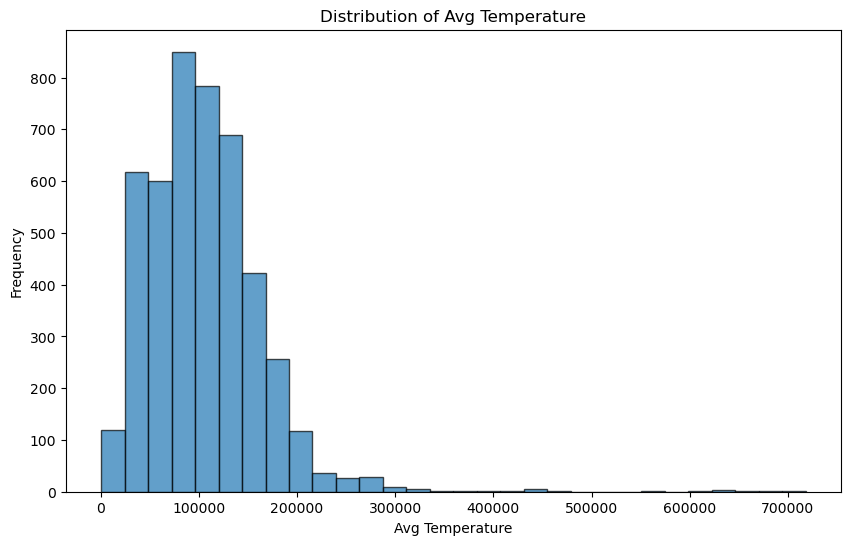

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(average_yield['Average Yield'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Avg Temperature')
plt.xlabel('Avg Temperature')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Filter data for 'Food price Inflation'
#consumer_price_indicators_df['Item'].unique()
food_inflation = CPI_df[CPI_df['Item'] == 'Food price inflation']
#food_inflation_data.head(5)
avg_inflation=food_inflation.groupby(['Year','Area','Area Code (M49)'])['Value'].mean().reset_index()
avg_inflation.rename(columns={
    'Value': 'Average inflation'}, inplace=True)
avg_inflation.head(10) ####--we need this--food inflation average value

,Year,Area,Area Code (M49),Average inflation
0,2001,Afghanistan,4,12.780692
1,2001,Albania,8,4.060863
2,2001,Algeria,12,4.573801
3,2001,Andorra,20,4.500643
4,2001,Angola,24,119.811108
5,2001,Anguilla,660,4.023406
6,2001,Antigua and Barbuda,28,1.741974
7,2001,Argentina,32,-1.906310
8,2001,Armenia,51,3.634929
9,2001,Aruba,533,4.093796


In [36]:
avg_inflation.isnull().sum()

Year                 0
Area                 0
Area Code (M49)      0
Average inflation    0
dtype: int64

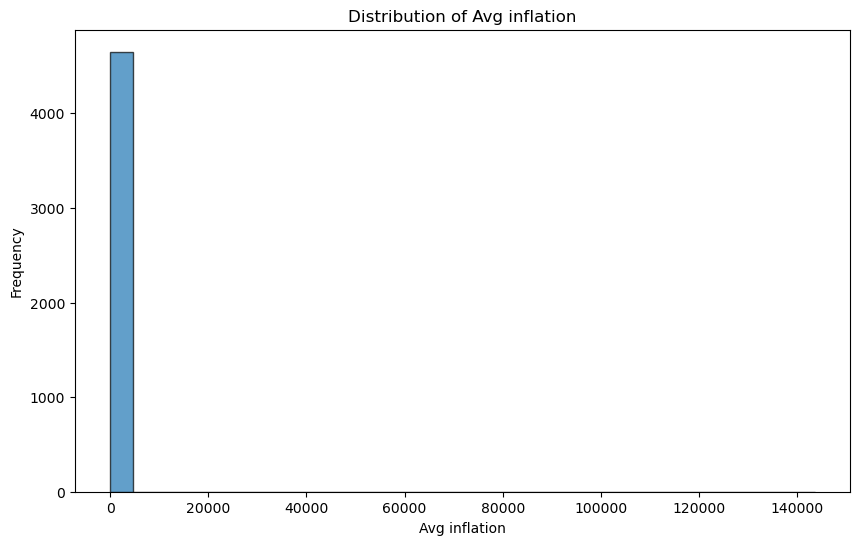

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(avg_inflation['Average inflation'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Avg inflation')
plt.xlabel('Avg inflation')
plt.ylabel('Frequency')
plt.show()

In [38]:
emission='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Emissions - FAOSTAT_data_en_2-27-2024.csv'
emission_df=pd.read_csv(emission)
# emission_df.head(10)


In [39]:
####---Emission---###

filtered_emission = emission_df[
    (emission_df['Domain']=='Emissions from Crops') & 
    (emission_df['Element'].isin(['Crops total (Emissions CH4)','Crops total (Emissions N2O)']))]


pivot_data_emission = filtered_emission.pivot_table(
    index=['Year','Area','Area Code (M49)'],
    columns='Element',
    values='Value').reset_index()
pivot_data_emission.columns = ['Year', 'Area', 'Area Code (M49)','Crops total (Emission_CH4)', 'Crops total (Emission_N2O)']

In [40]:
pivot_data_emission.head()

,Year,Area,Area Code (M49),Crops total (Emission_CH4),Crops total (Emission_N2O)
0,2000,Afghanistan,4,20.8471,0.7056
1,2000,Albania,8,0.2641,0.1446
2,2000,Algeria,12,0.9883,0.3698
3,2000,Angola,24,3.0820,0.2385
4,2000,Antigua and Barbuda,28,0.0001,0.0000


In [41]:
pivot_data_emission.isnull().sum()

Year                           0
Area                           0
Area Code (M49)                0
Crops total (Emission_CH4)    66
Crops total (Emission_N2O)     0
dtype: int64

In [42]:
# Step 4: Replace null values with 0
pivot_data_emission.fillna(0, inplace=True)

In [43]:
# Step 5: Create the Total Emission column
pivot_data_emission['Total Emission'] = pivot_data_emission['Crops total (Emission_CH4)'] + pivot_data_emission['Crops total (Emission_N2O)']

In [44]:
# Step 6: Drop the individual emission columns
pivot_data_emission.drop(columns=['Crops total (Emission_CH4)', 'Crops total (Emission_N2O)'], inplace=True)

In [45]:
pivot_data_emission.head()

,Year,Area,Area Code (M49),Total Emission
0,2000,Afghanistan,4,21.5527
1,2000,Albania,8,0.4087
2,2000,Algeria,12,1.3581
3,2000,Angola,24,3.3205
4,2000,Antigua and Barbuda,28,0.0001


In [46]:
pivot_data_emission.shape

(4228, 4)

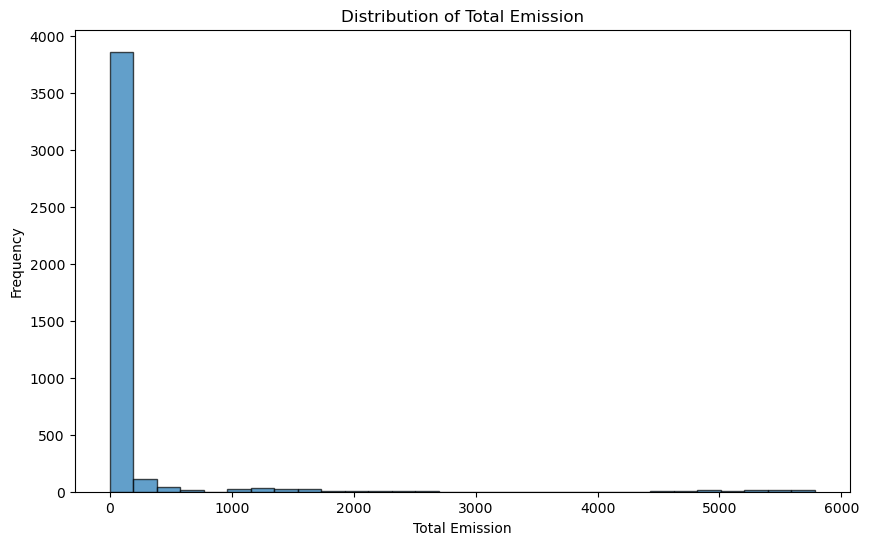

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(pivot_data_emission['Total Emission'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Emission')
plt.xlabel('Total Emission')
plt.ylabel('Frequency')
plt.show()

In [48]:
employment='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Employment - FAOSTAT_data_en_2-27-2024.csv'
employment_df=pd.read_csv(employment)
# employment_df.head(10)

In [49]:
# Pivot the table so that each indicator becomes a separate column
pivot_data_emp = employment_df.pivot_table(
    index=['Year', 'Area','Area Code (M49)'],
    columns='Indicator',
    values='Value', 
).reset_index()
pivot_data_emp.columns = ['Year', 'Area','Area Code (M49)', 'Employment in agriculture, forestry and fishing - ILO modelled estimates', 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']

In [50]:
pivot_data_emp.head()

,Year,Area,Area Code (M49),"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,2000,Afghanistan,4,2765.95,NaN
1,2000,Albania,8,557.29,NaN
2,2000,Algeria,12,1392.48,NaN
3,2000,Angola,24,2487.37,NaN
4,2000,Argentina,32,1762.42,NaN


In [51]:
pivot_data_emp.isnull().sum()

Year                                                                                             0
Area                                                                                             0
Area Code (M49)                                                                                  0
Employment in agriculture, forestry and fishing - ILO modelled estimates                        39
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing    2482
dtype: int64

In [52]:
# Step 6: Drop the individual emission columns
pivot_data_emp.drop(columns=['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'], inplace=True)

In [53]:
pivot_data_emp.head()

,Year,Area,Area Code (M49),"Employment in agriculture, forestry and fishing - ILO modelled estimates"
0,2000,Afghanistan,4,2765.95
1,2000,Albania,8,557.29
2,2000,Algeria,12,1392.48
3,2000,Angola,24,2487.37
4,2000,Argentina,32,1762.42


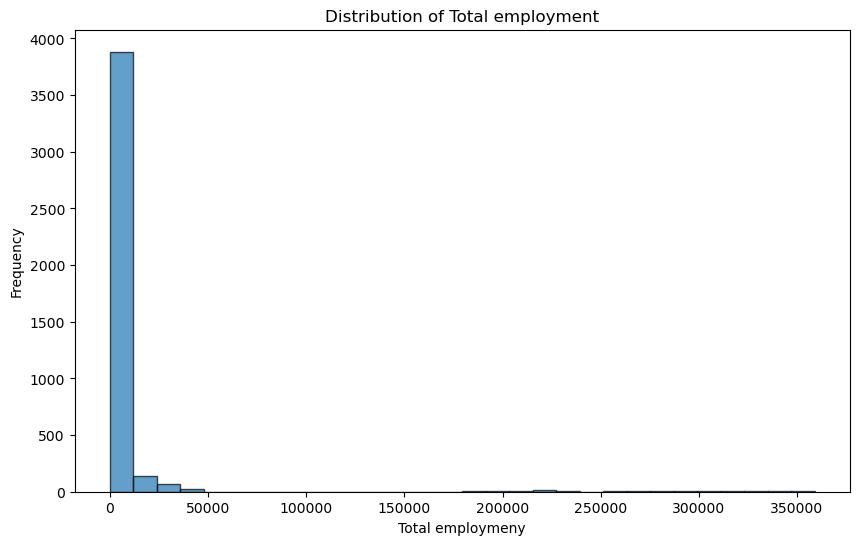

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(pivot_data_emp['Employment in agriculture, forestry and fishing - ILO modelled estimates'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total employment')
plt.xlabel('Total employmeny')
plt.ylabel('Frequency')
plt.show()

In [55]:
pivot_data_emp.shape

(4217, 4)

In [56]:
Fertilizer_use='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv'
fertilizer_use_df=pd.read_csv(Fertilizer_use)
#fertilizer_use_df.head(10)

In [57]:
fertilizer_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [58]:
fertilizer_use_df = fertilizer_use_df.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

In [59]:
fertilizer_use_df = fertilizer_use_df.rename(columns={'Value': 'Fertilizer'})

fertilizer_use_df.head(10)

,Year,Area,Area Code (M49),Fertilizer
0,2002,Afghanistan,4,17900.0
1,2002,Albania,8,119726.0
2,2002,Armenia,51,45028.0
3,2002,Australia,36,3150982.0
4,2002,Azerbaijan,31,54898.0
5,2002,Bahrain,48,39328.0
6,2002,Bangladesh,50,3298690.0
7,2002,Barbados,52,1712.0
8,2002,Belarus,112,1682277.0
9,2002,Benin,204,33063.0


In [60]:
fertilizer_use_df.shape

(1933, 4)

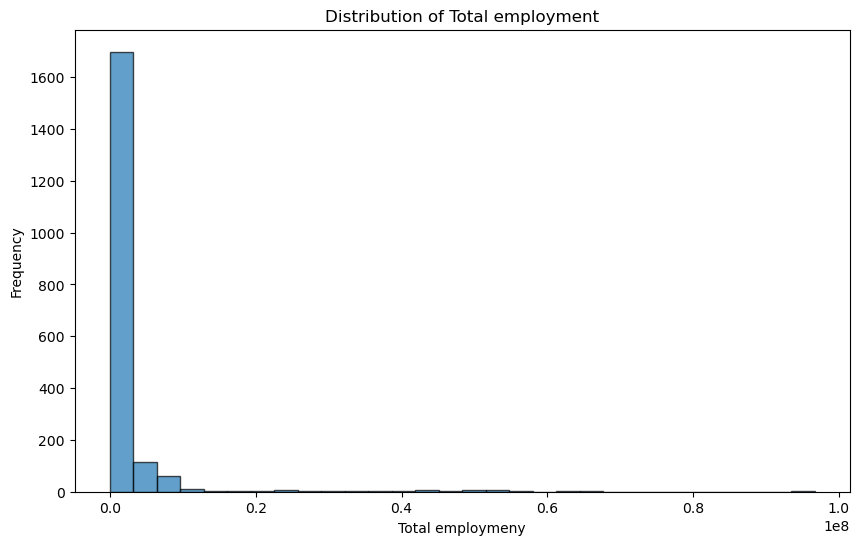

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(fertilizer_use_df['Fertilizer'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total employment')
plt.xlabel('Total employmeny')
plt.ylabel('Frequency')
plt.show()

In [62]:
FBI='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv'
FBI_df=pd.read_csv(FBI)

In [63]:
###--Food balance indicators---###
FBI_df['Element'].unique()

array(['Import Quantity', 'Export Quantity', 'Losses',
       'Other uses (non-food)', 'Food'], dtype=object)

In [64]:
FBI_df['Item'].unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
       'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object)

In [65]:
# Filter data to include only relevant "Items" and "Export Quantity"
crop_items = [
    'Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops', 'Pulses', 
    'Treenuts', 'Oilcrops', 'Vegetables', 'Fruits - Excluding Wine','Spices'
]
filtered_data = FBI_df[
    (FBI_df['Element'] == 'Export Quantity') & 
    (FBI_df['Item'].isin(crop_items))
]

# Group by 'Area' (country) and 'Year', and calculate the sum or average of 'Value'
export_quantities_df = filtered_data.groupby(['Year', 'Area','Area Code (M49)'])['Value'].sum().reset_index()

# Rename columns for clarity
export_quantities_df.rename(columns={'Value': 'Total Export Quantity'}, inplace=True)

# Output the processed data
export_quantities_df.head(10)

,Year,Area,Area Code (M49),Total Export Quantity
0,2010,Afghanistan,4,360.0
1,2010,Albania,8,40.0
2,2010,Algeria,12,37.0
3,2010,Angola,24,0.0
4,2010,Antigua and Barbuda,28,0.0
5,2010,Argentina,32,44840.0
6,2010,Armenia,51,22.0
7,2010,Australia,36,24815.0
8,2010,Austria,40,3459.0
9,2010,Azerbaijan,31,378.0


In [66]:
export_quantities_df.shape

(2175, 4)

In [67]:
export_quantities_df.isnull().sum()

Year                     0
Area                     0
Area Code (M49)          0
Total Export Quantity    0
dtype: int64

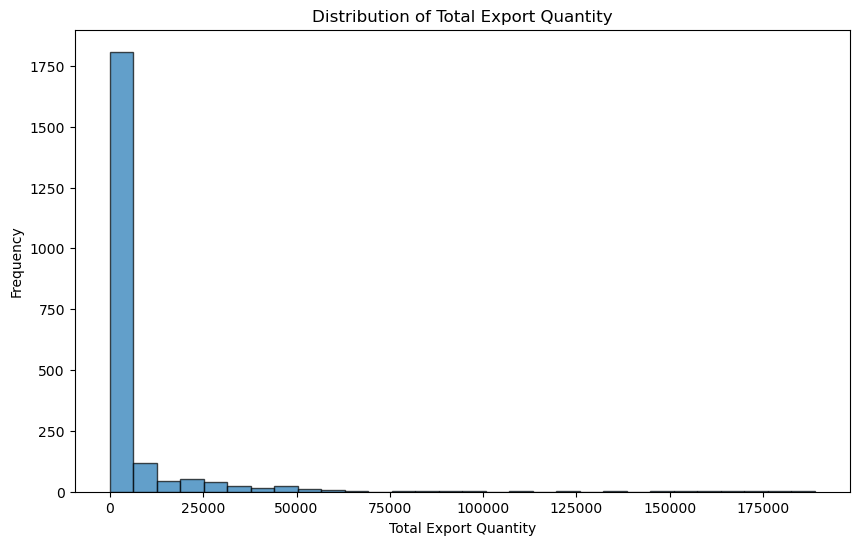

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(export_quantities_df['Total Export Quantity'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Export Quantity')
plt.xlabel('Total Export Quantity')
plt.ylabel('Frequency')
plt.show()

In [69]:
Foreign_direct_investment='/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv'
foreign_direct_df=pd.read_csv(Foreign_direct_investment)
#foreign_direct_df.head(10)

In [70]:
 foreign_direct_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [71]:
foreign_direct_df['Item'].unique()

array(['Total FDI inflows', 'Total FDI outflows',
       'FDI inflows to Agriculture, Forestry and Fishing',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Agriculture, Forestry and Fishing',
       'FDI outflows to Food, Beverages and Tobacco'], dtype=object)

In [72]:
# Filtering the DataFrame
foreign_direct_df = foreign_direct_df[foreign_direct_df['Item'].isin([
    'FDI inflows to Agriculture, Forestry and Fishing',
    'FDI outflows to Agriculture, Forestry and Fishing'
])]

In [73]:
foreign_direct_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,FDI,Foreign Direct Investment (FDI),8,Albania,6110,Value US$,23080,"FDI inflows to Agriculture, Forestry and Fishing",2004,2004,million USD,0.642888,X,Figure from international organizations,UNCTAD
40,FDI,Foreign Direct Investment (FDI),8,Albania,6110,Value US$,23080,"FDI inflows to Agriculture, Forestry and Fishing",2005,2005,million USD,0.494601,X,Figure from international organizations,UNCTAD
41,FDI,Foreign Direct Investment (FDI),8,Albania,6110,Value US$,23080,"FDI inflows to Agriculture, Forestry and Fishing",2006,2006,million USD,2.508966,X,Figure from international organizations,UNCTAD
42,FDI,Foreign Direct Investment (FDI),8,Albania,6110,Value US$,23080,"FDI inflows to Agriculture, Forestry and Fishing",2007,2007,million USD,2.737334,X,Figure from international organizations,UNCTAD
43,FDI,Foreign Direct Investment (FDI),8,Albania,6110,Value US$,23080,"FDI inflows to Agriculture, Forestry and Fishing",2008,2008,million USD,-79.100597,X,Figure from international organizations,UNCTAD


In [74]:
total_FDI=foreign_direct_df.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()
total_FDI.rename(columns={'Value': 'FDI_total'}, inplace=True)
total_FDI.head(10)

,Year,Area,Area Code (M49),FDI_total
0,2000,Australia,36,151.899028
1,2000,Austria,40,0.921319
2,2000,Bangladesh,50,15.180000
3,2000,Cambodia,116,5.812000
4,2000,Chile,152,251.526000
5,2000,"China, Taiwan Province of",158,2.716454
6,2000,"China, mainland",156,675.940000
7,2000,Colombia,170,-2.250282
8,2000,Costa Rica,188,-28.705000
9,2000,Croatia,191,14.658191


In [75]:
total_FDI.shape

(1695, 4)

In [76]:
total_FDI.isnull().sum()

Year               0
Area               0
Area Code (M49)    0
FDI_total          0
dtype: int64

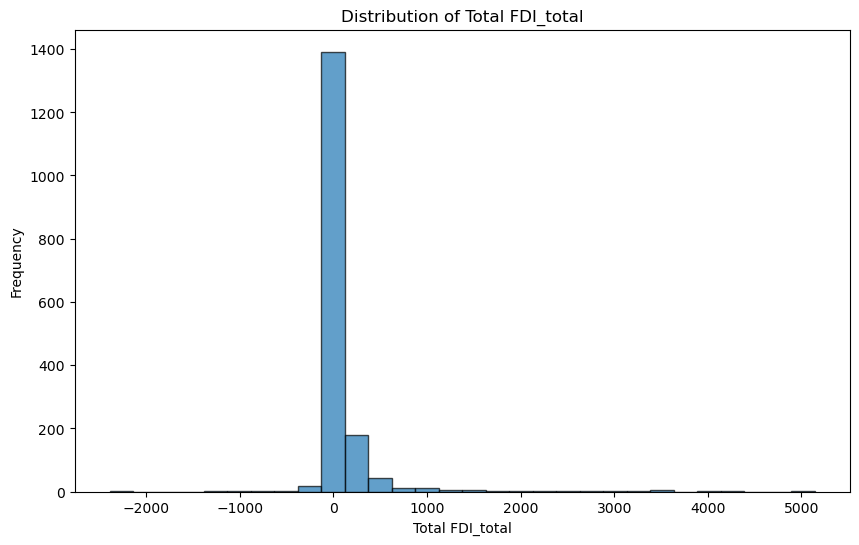

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(total_FDI['FDI_total'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total FDI_total')
plt.xlabel('Total FDI_total')
plt.ylabel('Frequency')
plt.show()

In [78]:
land_use = '/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv'
land_use_df=pd.read_csv(land_use)
#foreign_direct_df.head(10)

/var/folders/7x/0sq5q3rd48j9xm57xlcpm7sc0000gn/T/ipykernel_73594/4097516550.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  land_use_df=pd.read_csv(land_use)


In [79]:
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [80]:
land_use_df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [81]:
land_use_df['Item'].unique()

array(['Country area', 'Land area', 'Agriculture', 'Agricultural land',
       'Cropland', 'Arable land', 'Temporary crops',
       'Temporary meadows and pastures', 'Temporary fallow',
       'Permanent crops', 'Permanent meadows and pastures',
       'Perm. meadows & pastures - Nat. growing',
       'Land area equipped for irrigation',
       'Land area actually irrigated',
       'Agriculture area actually irrigated',
       'Farm buildings and Farmyards', 'Cropland area actually irrigated',
       'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures area actually irrig.',
       'Forestry area actually irrigated'], dtype=object)

In [82]:
# Filtering the DataFrame
land_use_df = land_use_df[land_use_df['Item'].isin([
    'Agriculture','Agricultural land','Agriculture area actually irrigated','Cropland area actually irrigated'
])]


In [83]:
# Group by 'Area' and 'Year', then calculate the sum and average for each group
land_use_df = land_use_df.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

In [84]:
land_use_df = land_use_df.rename(columns={'Value': 'Total_land'})
land_use_df.head()

,Year,Area,Area Code (M49),Total_land
0,1980,Afghanistan,4,76098.00
1,1980,Albania,8,2236.00
2,1980,Algeria,12,87660.00
3,1980,American Samoa,16,3.86
4,1980,Andorra,20,46.00


In [85]:
land_use_df.isnull().sum()

Year               0
Area               0
Area Code (M49)    0
Total_land         0
dtype: int64

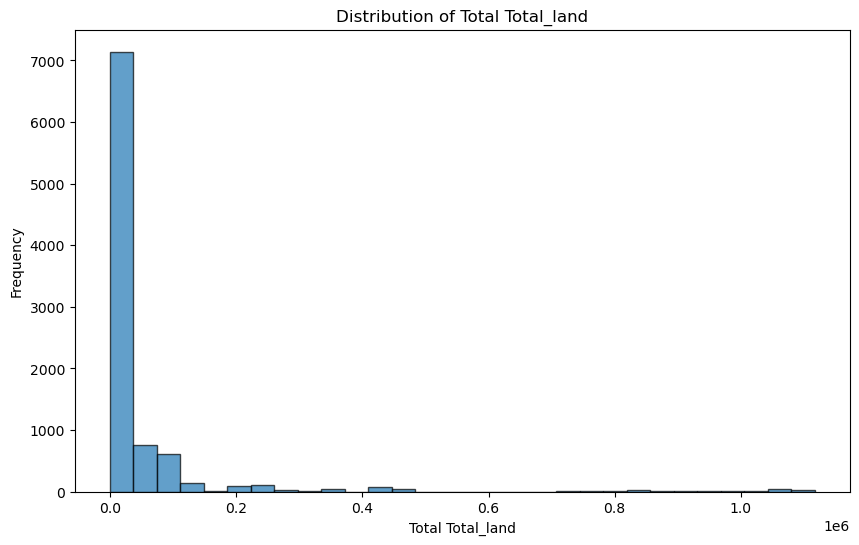

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(land_use_df['Total_land'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Total_land')
plt.xlabel('Total Total_land')
plt.ylabel('Frequency')
plt.show()

In [87]:
Pesticides_use = '/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Pesticides use - FAOSTAT_data_en_2-27-2024.csv'
Pesticides_df=pd.read_csv(Pesticides_use)
#foreign_direct_df.head(10)

In [88]:
Pesticides_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [89]:
Pesticides_df['Unit'].unique()

array(['t', 'kg/ha', 'g/Int$'], dtype=object)

In [90]:
import pandas as pd

# Assuming 'data' is your loaded DataFrame
# And assuming 'total_area' and 'total_economic_output' are available

# Convert kg/ha to tons
Pesticides_df.loc[Pesticides_df['Unit'] == 'kg/ha', 'Value'] = (Pesticides_df['Value']) / 1000

# Convert g/Int$ to tons
Pesticides_df.loc[Pesticides_df['Unit'] == 'g/Int$', 'Value'] = (Pesticides_df['Value'] ) / 1_000_000_000

# Ensure that the data with unit 't' remains unchanged
# This line is actually redundant as these values are already in the correct unit but ensures clarity
Pesticides_df.loc[Pesticides_df['Unit'] == 't', 'Value'] = Pesticides_df['Value']

# Optionally, update all units to 't' after conversion
Pesticides_df['Unit'] = 't'


In [91]:
Pesticides_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,3.079800e+02,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,t,4.400000e-04,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,t,2.300000e-10,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,3.193800e+02,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,t,4.600000e-04,E,Estimated value,NaN


In [92]:
Pesticides_df['Item'].unique()

array(['Pesticides (total)', 'Insecticides', 'Herbicides',
       'Fungicides and Bactericides', 'Fungicides – Seed treatments',
       'Insecticides – Seed Treatments', 'Rodenticides'], dtype=object)

In [93]:
# Group by 'Area' and 'Year', then calculate the sum and average for each group
Pesticides_df = Pesticides_df.groupby(['Year','Area','Area Code (M49)'])['Value'].sum().reset_index()

In [94]:
Pesticides_df = Pesticides_df.rename(columns={'Value': 'Total_Pesticides'})
Pesticides_df.head()

,Year,Area,Area Code (M49),Total_Pesticides
0,2000,Albania,8,607.90044
1,2000,Algeria,12,3931.30031
2,2000,Andorra,20,35.48855
3,2000,Angola,24,80.00001
4,2000,Anguilla,660,41.25000


In [95]:
Pesticides_df.shape

(4636, 4)

In [96]:
Pesticides_df.isnull().sum()

Year                0
Area                0
Area Code (M49)     0
Total_Pesticides    0
dtype: int64

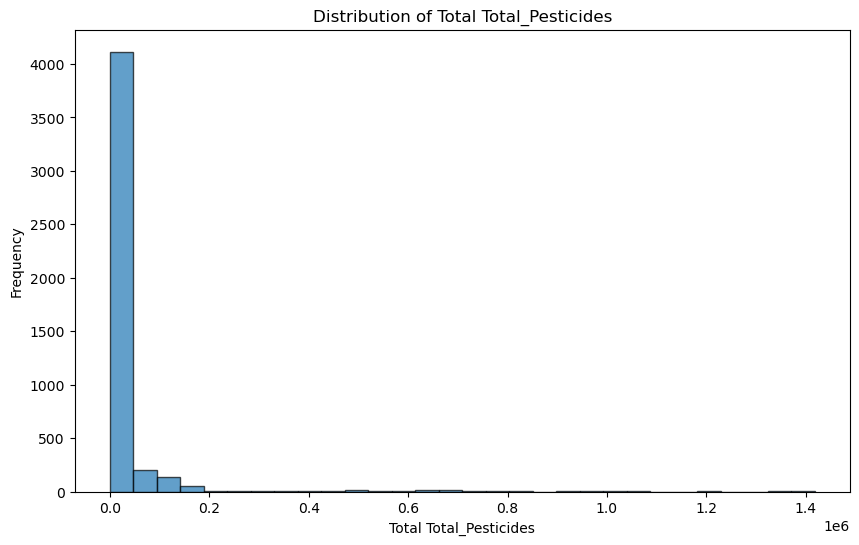

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(Pesticides_df['Total_Pesticides'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Total_Pesticides')
plt.xlabel('Total Total_Pesticides')
plt.ylabel('Frequency')
plt.show()

In [98]:
df_exchange_rate = pd.read_csv('/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Exchange rate - FAOSTAT_data_en_2-22-2024.csv')

In [99]:
df_exchange_rate.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [100]:
filtered_exchange_rate = df_exchange_rate.groupby(['Area Code (M49)','Area', 'Year'])['Value'].mean().reset_index()

In [101]:
filtered_exchange_rate.rename(columns={'Value' : 'exchange_rate'}, inplace = True)

In [102]:
filtered_exchange_rate.head()

,Area Code (M49),Area,Year,exchange_rate
0,4,Afghanistan,1980,44.129167
1,4,Afghanistan,1981,49.479902
2,4,Afghanistan,1982,50.599608
3,4,Afghanistan,1983,50.599608
4,4,Afghanistan,1984,50.599606


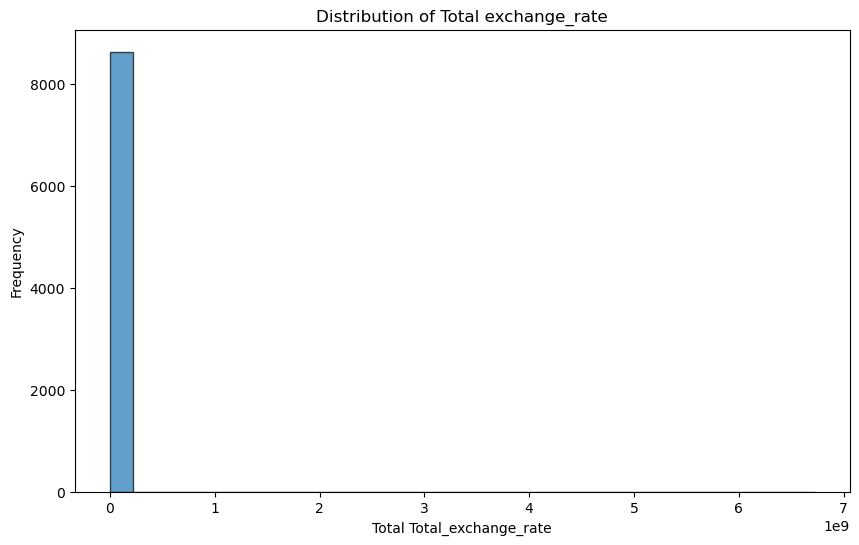

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_exchange_rate['exchange_rate'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total exchange_rate')
plt.xlabel('Total Total_exchange_rate')
plt.ylabel('Frequency')
plt.show()

In [104]:
df_food_security = pd.read_csv('/Users/thenuka/Desktop/Machine Learning/ML Coursework Dataset/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')

In [105]:
df_food_security.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [106]:
df_food_security['Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'], dtype=object)

In [107]:
# Filtering the DataFrame
df_food_security = df_food_security[df_food_security['Item'].isin([
    'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
    'Per capita food supply variability (kcal/cap/day'])]

In [108]:
df_food_security = df_food_security.groupby(['Area Code (M49)','Area', 'Year'])['Value'].mean().reset_index()

In [109]:
df_food_security.isnull().sum()

Area Code (M49)    0
Area               0
Year               0
Value              0
dtype: int64

In [110]:
df_food_security = df_food_security.rename(columns={'Value': 'Total_food_security'})
df_food_security.head()

,Area Code (M49),Area,Year,Total_food_security
0,4,Afghanistan,2001,16.3
1,4,Afghanistan,2002,21.0
2,4,Afghanistan,2003,20.8
3,4,Afghanistan,2004,17.3
4,4,Afghanistan,2005,12.4


In [111]:
df_food_security.dtypes

Area Code (M49)          int64
Area                    object
Year                    object
Total_food_security    float64
dtype: object

In [112]:
df_food_security['Year'] = df_food_security['Year'].astype(int)

In [113]:
df_food_security.dtypes

Area Code (M49)          int64
Area                    object
Year                     int64
Total_food_security    float64
dtype: object

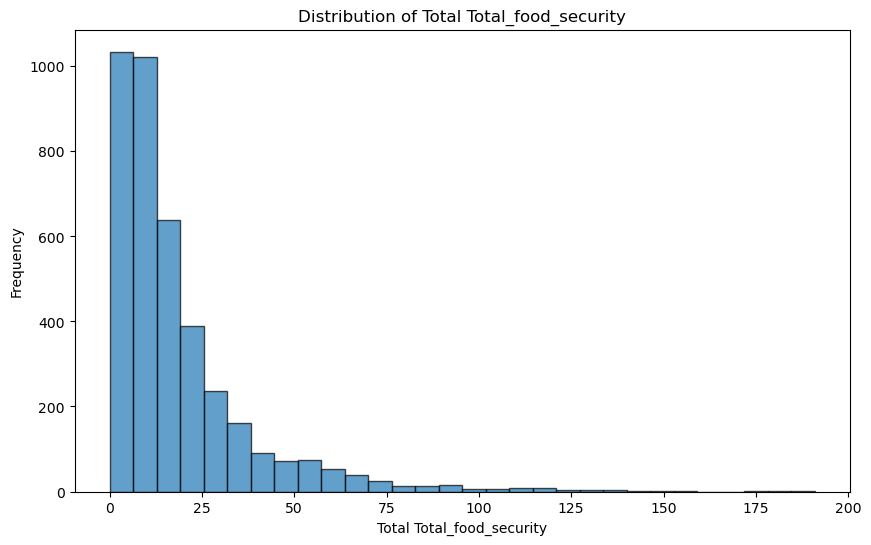

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(df_food_security['Total_food_security'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Total_food_security')
plt.xlabel('Total Total_food_security')
plt.ylabel('Frequency')
plt.show()

In [115]:
merged_df = pd.merge(avg_inflation, average_yield, on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [116]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield
0,2001,Afghanistan,4,12.780692,60701.272727
1,2001,Albania,8,4.060863,86334.727273
2,2001,Algeria,12,4.573801,46433.300000
3,2001,Andorra,20,4.500643,NaN
4,2001,Angola,24,119.811108,69338.454545


In [117]:
merged_df.shape

(5178, 5)

In [118]:
merged_df=pd.merge(merged_df,pivot_data_emission,on=['Year', 'Area', 'Area Code (M49)'],how='outer') ##emission

In [119]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659
1,2001,Albania,8,4.060863,86334.727273,0.3770
2,2001,Algeria,12,4.573801,46433.300000,2.9602
3,2001,Andorra,20,4.500643,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117


In [120]:
merged_df.shape

(5178, 6)

In [121]:
merged_df=pd.merge(merged_df,pivot_data_emp,on=['Year', 'Area', 'Area Code (M49)'],how='outer') ##pivot_data1-employment

In [122]:
merged_df.shape

(5270, 7)

In [123]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates"
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84
3,2001,Andorra,20,4.500643,NaN,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54


In [124]:
merged_df=pd.merge(merged_df,fertilizer_use_df,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [125]:
merged_df.shape

(5270, 8)

In [126]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN


In [127]:
merged_df=pd.merge(merged_df,export_quantities_df,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [128]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN


In [129]:
merged_df.shape

(5270, 9)

In [130]:
merged_df=pd.merge(merged_df,total_export_value,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [131]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD)
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0


In [132]:
merged_df.shape

(6933, 10)

In [133]:
merged_df=pd.merge(merged_df,total_FDI,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [134]:
merged_df.shape

(6935, 11)

In [135]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN


In [136]:
merged_df=pd.merge(merged_df,temperature_use_df,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [137]:
merged_df.shape

(7473, 12)

In [138]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN,1.0718
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN,1.1336
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN,1.2049
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1151
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN,0.2855


In [139]:
merged_df=pd.merge(merged_df,land_use_df,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [140]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN,1.0718,77730.0
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN,1.1336,2278.0
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN,1.2049,80218.0
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1151,45.5
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN,0.2855,88830.0


In [141]:
merged_df.shape

(10067, 13)

In [142]:
merged_df=pd.merge(merged_df,Pesticides_df,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [143]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land,Total_Pesticides
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN,1.0718,77730.0,NaN
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN,1.1336,2278.0,629.09046
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN,1.2049,80218.0,4549.77035
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1151,45.5,34.32400
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN,0.2855,88830.0,80.00001


In [144]:
merged_df.shape

(10078, 14)

In [145]:
merged_df=pd.merge(merged_df,filtered_exchange_rate,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [146]:
merged_df=pd.merge(merged_df,df_food_security,on=['Year', 'Area', 'Area Code (M49)'],how='outer')

In [147]:
merged_df.head()

,Year,Area,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land,Total_Pesticides,exchange_rate,Total_food_security
0,2001,Afghanistan,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN,1.0718,77730.0,NaN,47500.014520,16.3
1,2001,Albania,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN,1.1336,2278.0,629.09046,143.484833,9.1
2,2001,Algeria,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN,1.2049,80218.0,4549.77035,77.215021,14.3
3,2001,Andorra,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1151,45.5,34.32400,1.117299,NaN
4,2001,Angola,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN,0.2855,88830.0,80.00001,22.057862,7.9


In [148]:
missing_values = merged_df.isnull().sum()

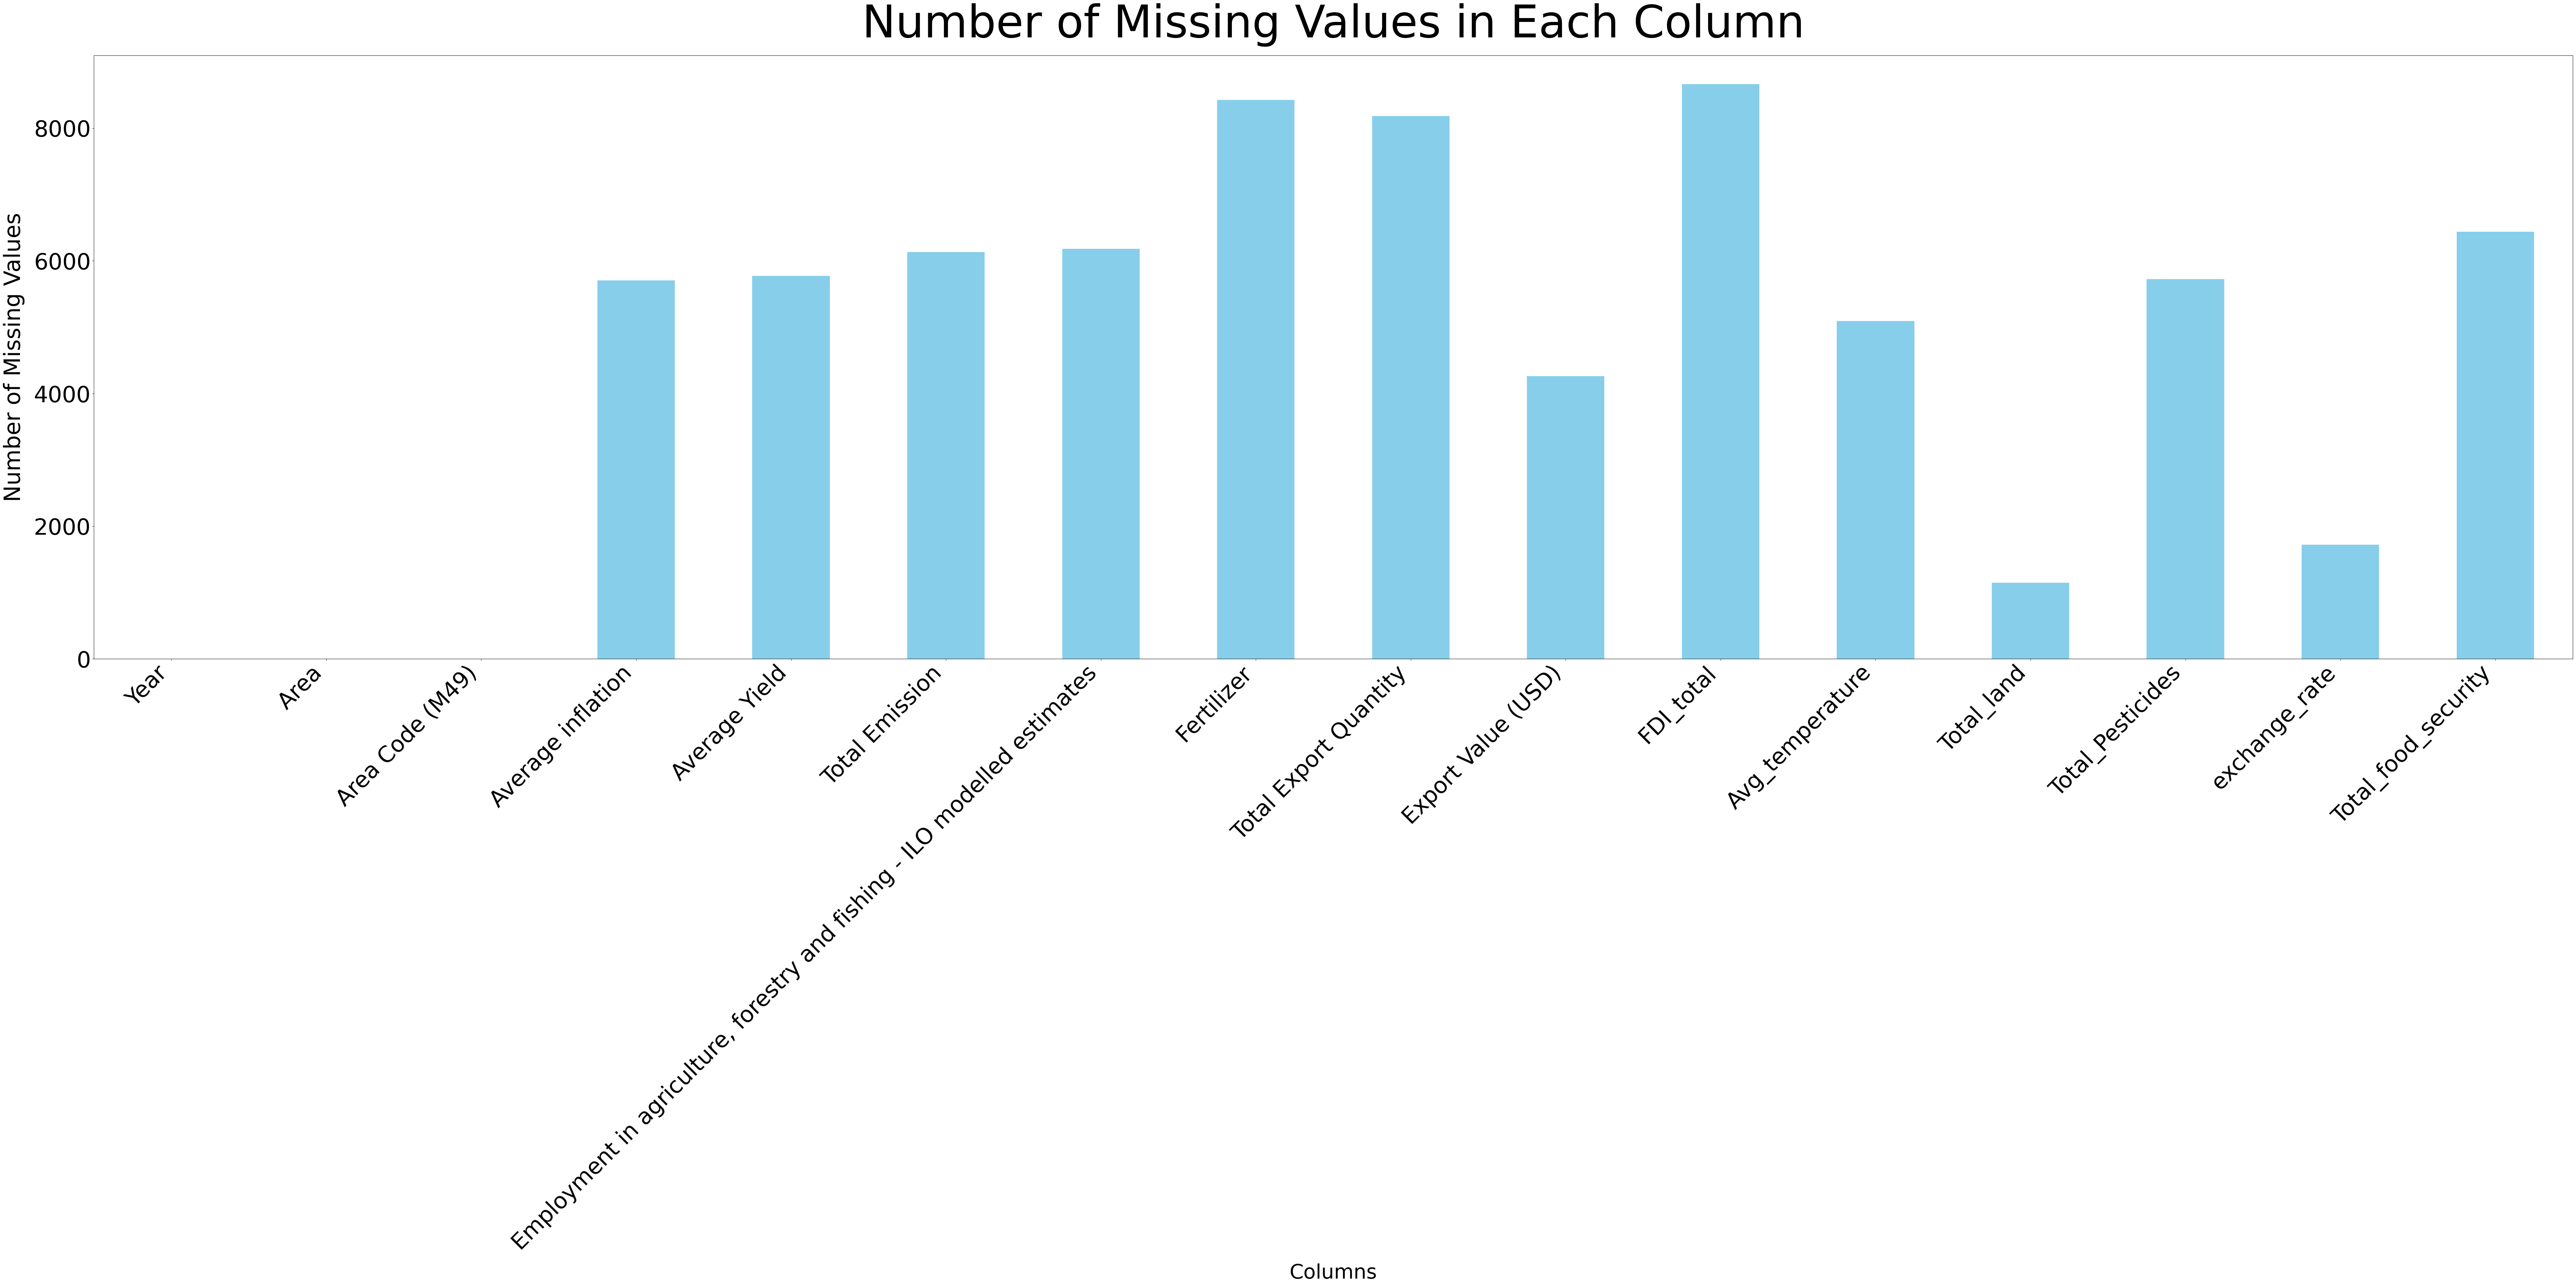

In [149]:
# Plot the graph with adjusted figure size and spacing to avoid overlapping labels
plt.figure(figsize=(80, 40))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Each Column', fontsize=100, pad=40)
plt.xlabel('Columns', fontsize=45, labelpad=20)
plt.ylabel('Number of Missing Values', fontsize=50, labelpad=20)
plt.xticks(rotation=45, ha='right', fontsize=50)  # Rotate labels to avoid overlapping
plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()



In [150]:
null_value_percentage = merged_df.isnull().mean() * 100

In [151]:
print(null_value_percentage)

Year                                                                         0.000000
Area                                                                         0.000000
Area Code (M49)                                                              0.000000
Average inflation                                                           55.091207
Average Yield                                                               55.728212
Total Emission                                                              59.193128
Employment in agriculture, forestry and fishing - ILO modelled estimates    59.675707
Fertilizer                                                                  81.343500
Total Export Quantity                                                       79.007818
Export Value (USD)                                                          41.135026
FDI_total                                                                   83.640575
Avg_temperature                                       

In [152]:
merged_df = merged_df.drop('Area', axis=1)

In [153]:
merged_df.head()

,Year,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land,Total_Pesticides,exchange_rate,Total_food_security
0,2001,4,12.780692,60701.272727,19.9659,2805.54,NaN,NaN,27110000.0,NaN,1.0718,77730.0,NaN,47500.014520,16.3
1,2001,8,4.060863,86334.727273,0.3770,545.33,NaN,NaN,8306000.0,NaN,1.1336,2278.0,629.09046,143.484833,9.1
2,2001,12,4.573801,46433.300000,2.9602,1443.84,NaN,NaN,18108000.0,NaN,1.2049,80218.0,4549.77035,77.215021,14.3
3,2001,20,4.500643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1151,45.5,34.32400,1.117299,NaN
4,2001,24,119.811108,69338.454545,3.4117,2545.54,NaN,NaN,0.0,NaN,0.2855,88830.0,80.00001,22.057862,7.9


In [154]:
merged_df.dtypes

Year                                                                          int64
Area Code (M49)                                                               int64
Average inflation                                                           float64
Average Yield                                                               float64
Total Emission                                                              float64
Employment in agriculture, forestry and fishing - ILO modelled estimates    float64
Fertilizer                                                                  float64
Total Export Quantity                                                       float64
Export Value (USD)                                                          float64
FDI_total                                                                   float64
Avg_temperature                                                             float64
Total_land                                                                  

In [155]:
# Impute missing values with the 0 for all numeric columns
merged_df.fillna(0, inplace=True)


In [156]:
merged_df.isnull().sum()

Year                                                                        0
Area Code (M49)                                                             0
Average inflation                                                           0
Average Yield                                                               0
Total Emission                                                              0
Employment in agriculture, forestry and fishing - ILO modelled estimates    0
Fertilizer                                                                  0
Total Export Quantity                                                       0
Export Value (USD)                                                          0
FDI_total                                                                   0
Avg_temperature                                                             0
Total_land                                                                  0
Total_Pesticides                                                

In [157]:
merged_df.head()

,Year,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land,Total_Pesticides,exchange_rate,Total_food_security
0,2001,4,12.780692,60701.272727,19.9659,2805.54,0.0,0.0,27110000.0,0.0,1.0718,77730.0,0.00000,47500.014520,16.3
1,2001,8,4.060863,86334.727273,0.3770,545.33,0.0,0.0,8306000.0,0.0,1.1336,2278.0,629.09046,143.484833,9.1
2,2001,12,4.573801,46433.300000,2.9602,1443.84,0.0,0.0,18108000.0,0.0,1.2049,80218.0,4549.77035,77.215021,14.3
3,2001,20,4.500643,0.000000,0.0000,0.00,0.0,0.0,0.0,0.0,1.1151,45.5,34.32400,1.117299,0.0
4,2001,24,119.811108,69338.454545,3.4117,2545.54,0.0,0.0,0.0,0.0,0.2855,88830.0,80.00001,22.057862,7.9


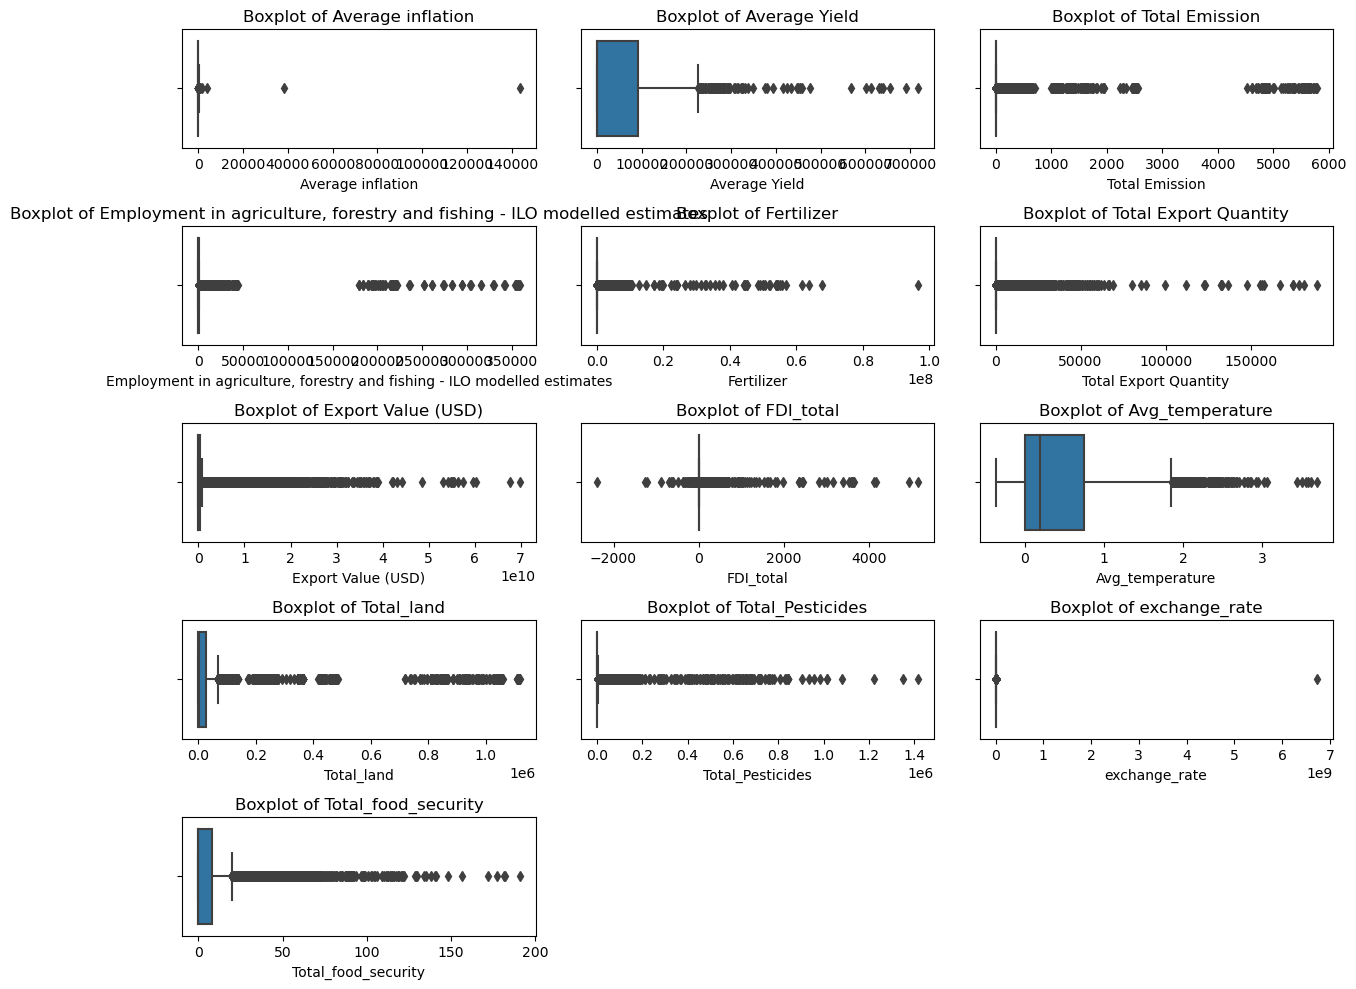

In [158]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming merged_df is your DataFrame with float64 columns identified

# # Identify float64 columns
# float_cols = merged_df.select_dtypes(include=['float64']).columns

# # Dictionary to hold outliers for each float column
# outliers_dict = {}

# # Determine the layout for subplots based on the number of float columns
# n_cols = 2  # Number of columns in the subplot grid
# n_rows = (len(float_cols) + 1) // n_cols  # Calculate required number of rows, rounded up

# # Set up the matplotlib figure
# plt.figure(figsize=(12, n_rows * 4))  # Adjust the size as needed, with height based on the number of rows

# # Loop through each float column to calculate IQR, identify outliers, and create a boxplot
# for i, column in enumerate(float_cols):
#     # Calculate IQR
#     Q1 = merged_df[column].quantile(0.25)
#     Q3 = merged_df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = merged_df[(merged_df[column] < (Q1 - 1.5 * IQR)) | (merged_df[column] > (Q3 + 1.5 * IQR))]
    
#     # Store outliers in a dictionary
#     outliers_dict[column] = outliers

#     # Create a subplot for the boxplot
#     plt.subplot(n_rows, n_cols, i + 1)
#     sns.boxplot(x=merged_df[column])
#     plt.title(f'Boxplot of {column}')  # Title the subplot with the column name

# # Adjust layout to prevent overlapping of plots
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with float64 columns identified

# Identify float64 columns
float_cols = merged_df.select_dtypes(include=['float64']).columns

# Dictionary to hold outliers for each float column
outliers_dict = {}

# Determine the layout for subplots based on the number of float columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(float_cols) + n_cols - 1) // n_cols  # Calculate required number of rows, rounded up

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 4, n_rows * 2))  # Adjust the size as needed, with height based on the number of rows

# Loop through each float column to calculate IQR, identify outliers, and create a boxplot
for i, column in enumerate(float_cols):
    # Calculate IQR
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = merged_df[(merged_df[column] < (Q1 - 1.5 * IQR)) | (merged_df[column] > (Q3 + 1.5 * IQR))]
    
    # Store outliers in a dictionary
    outliers_dict[column] = outliers

    # Create a subplot for the boxplot
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=merged_df[column])
    plt.title(f'Boxplot of {column}')  # Title the subplot with the column name

# Adjust layout to prevent overlapping of plots
plt.tight_layout()
plt.show()



In [159]:
# # Assuming merged_df is your DataFrame and float_cols contains your float64 columns
# float_cols = merged_df.select_dtypes(include=['float64']).columns

# # Initialize a mask for rows to keep
# mask = pd.Series(True, index=merged_df.index)

# # Calculate IQR and update the mask for each column
# for column in float_cols:
#     Q1 = merged_df[column].quantile(0.25)
#     Q3 = merged_df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     # Update mask to exclude outliers
#     mask &= merged_df[column].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# # Filter the DataFrame to remove outliers
# cleaned_df = merged_df[mask]

# print("Original DataFrame size:", merged_df.shape)
# print("New DataFrame size without outliers:", cleaned_df.shape)

from scipy import stats
import numpy as np
# Calculate Z-scores
z_scores = stats.zscore(merged_df[float_cols])

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Create a mask for data within the threshold
mask = (np.abs(z_scores) < threshold).all(axis=1)

# Filter the DataFrame
cleaned_df = merged_df[mask]



In [160]:
cleaned_df.head()

,Year,Area Code (M49),Average inflation,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Avg_temperature,Total_land,Total_Pesticides,exchange_rate,Total_food_security
0,2001,4,12.780692,60701.272727,19.9659,2805.54,0.0,0.0,27110000.0,0.0,1.0718,77730.0,0.00000,47500.014520,16.3
1,2001,8,4.060863,86334.727273,0.3770,545.33,0.0,0.0,8306000.0,0.0,1.1336,2278.0,629.09046,143.484833,9.1
2,2001,12,4.573801,46433.300000,2.9602,1443.84,0.0,0.0,18108000.0,0.0,1.2049,80218.0,4549.77035,77.215021,14.3
3,2001,20,4.500643,0.000000,0.0000,0.00,0.0,0.0,0.0,0.0,1.1151,45.5,34.32400,1.117299,0.0
4,2001,24,119.811108,69338.454545,3.4117,2545.54,0.0,0.0,0.0,0.0,0.2855,88830.0,80.00001,22.057862,7.9


In [161]:
cleaned_df.isnull().sum()

Year                                                                        0
Area Code (M49)                                                             0
Average inflation                                                           0
Average Yield                                                               0
Total Emission                                                              0
Employment in agriculture, forestry and fishing - ILO modelled estimates    0
Fertilizer                                                                  0
Total Export Quantity                                                       0
Export Value (USD)                                                          0
FDI_total                                                                   0
Avg_temperature                                                             0
Total_land                                                                  0
Total_Pesticides                                                

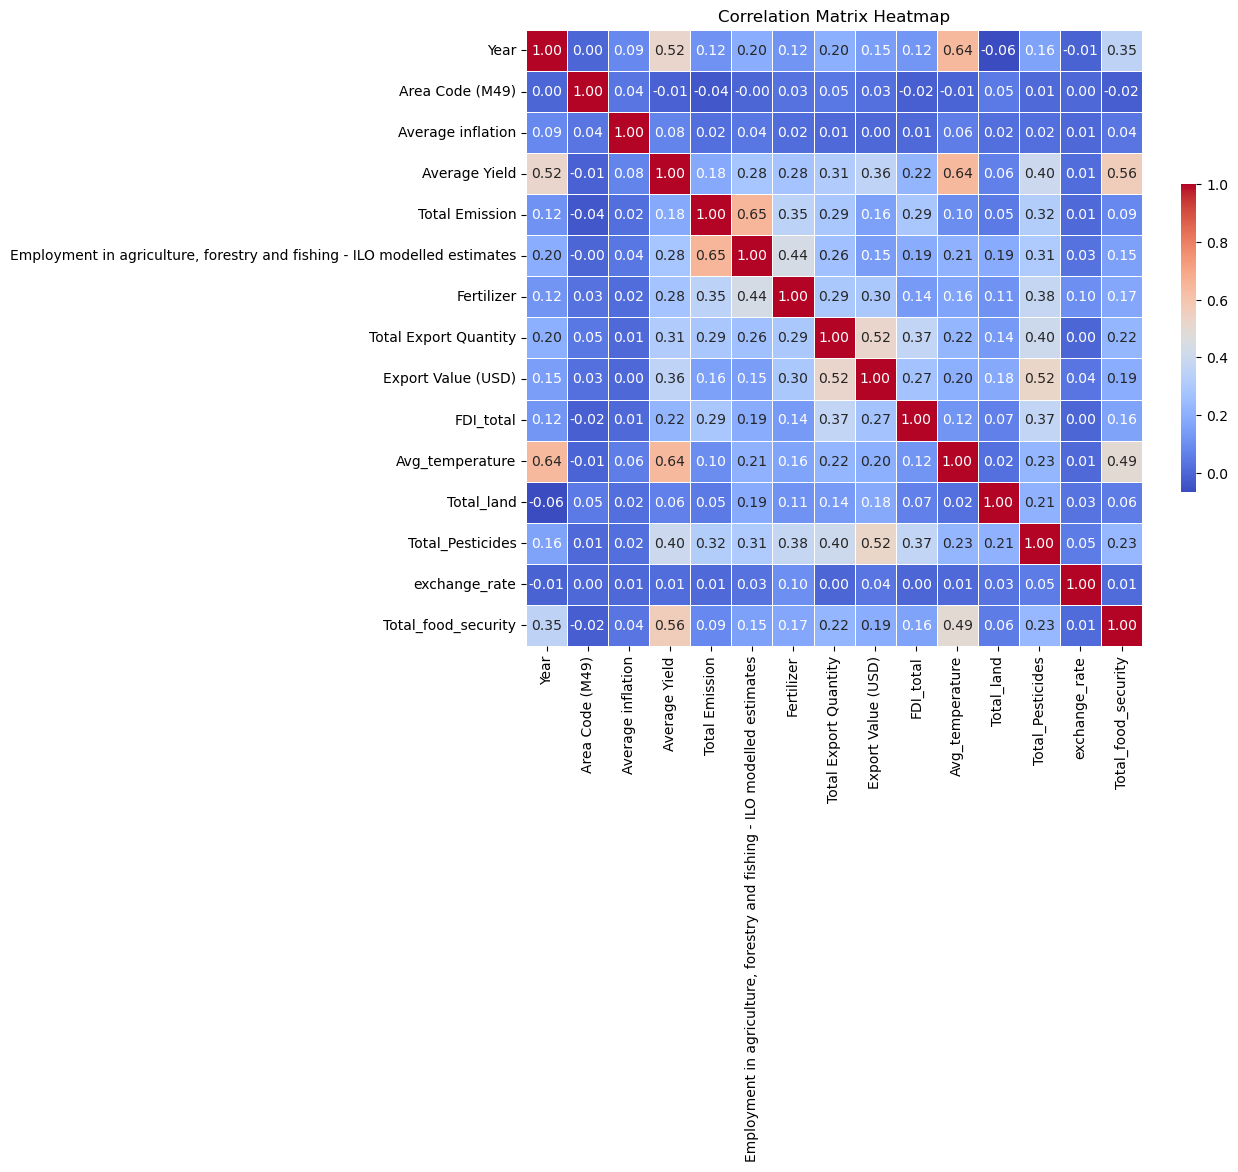

In [162]:
# Calculate the correlation matrix
corr_matrix = cleaned_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the size to fit your dataset

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [163]:
cleaned_df.columns

Index(['Year', 'Area Code (M49)', 'Average inflation', 'Average Yield',
       'Total Emission',
       'Employment in agriculture, forestry and fishing - ILO modelled estimates',
       'Fertilizer', 'Total Export Quantity', 'Export Value (USD)',
       'FDI_total', 'Avg_temperature', 'Total_land', 'Total_Pesticides',
       'exchange_rate', 'Total_food_security'],
      dtype='object')

In [164]:
cleaned_df.drop(columns=['Average inflation'], inplace=True)
cleaned_df.drop(columns=['exchange_rate'], inplace=True)

/var/folders/7x/0sq5q3rd48j9xm57xlcpm7sc0000gn/T/ipykernel_73594/665002357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=['Average inflation'], inplace=True)
/var/folders/7x/0sq5q3rd48j9xm57xlcpm7sc0000gn/T/ipykernel_73594/665002357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=['exchange_rate'], inplace=True)


In [165]:
cleaned_df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2000, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [166]:
# train_df.head()
cleaned_df.shape

(9474, 13)

In [167]:
# Calculate skewness for each column
skewness = cleaned_df.skew()
print("Original Skewness:")
print(skewness)


Original Skewness:
Year                                                                        0.014636
Area Code (M49)                                                             0.008466
Average Yield                                                               1.187224
Total Emission                                                              9.502531
Employment in agriculture, forestry and fishing - ILO modelled estimates    6.195104
Fertilizer                                                                  9.404948
Total Export Quantity                                                       9.700399
Export Value (USD)                                                          5.347226
FDI_total                                                                   8.293842
Avg_temperature                                                             1.025993
Total_land                                                                  4.481281
Total_Pesticides                              

In [168]:
cleaned_df.columns

Index(['Year', 'Area Code (M49)', 'Average Yield', 'Total Emission',
       'Employment in agriculture, forestry and fishing - ILO modelled estimates',
       'Fertilizer', 'Total Export Quantity', 'Export Value (USD)',
       'FDI_total', 'Avg_temperature', 'Total_land', 'Total_Pesticides',
       'Total_food_security'],
      dtype='object')

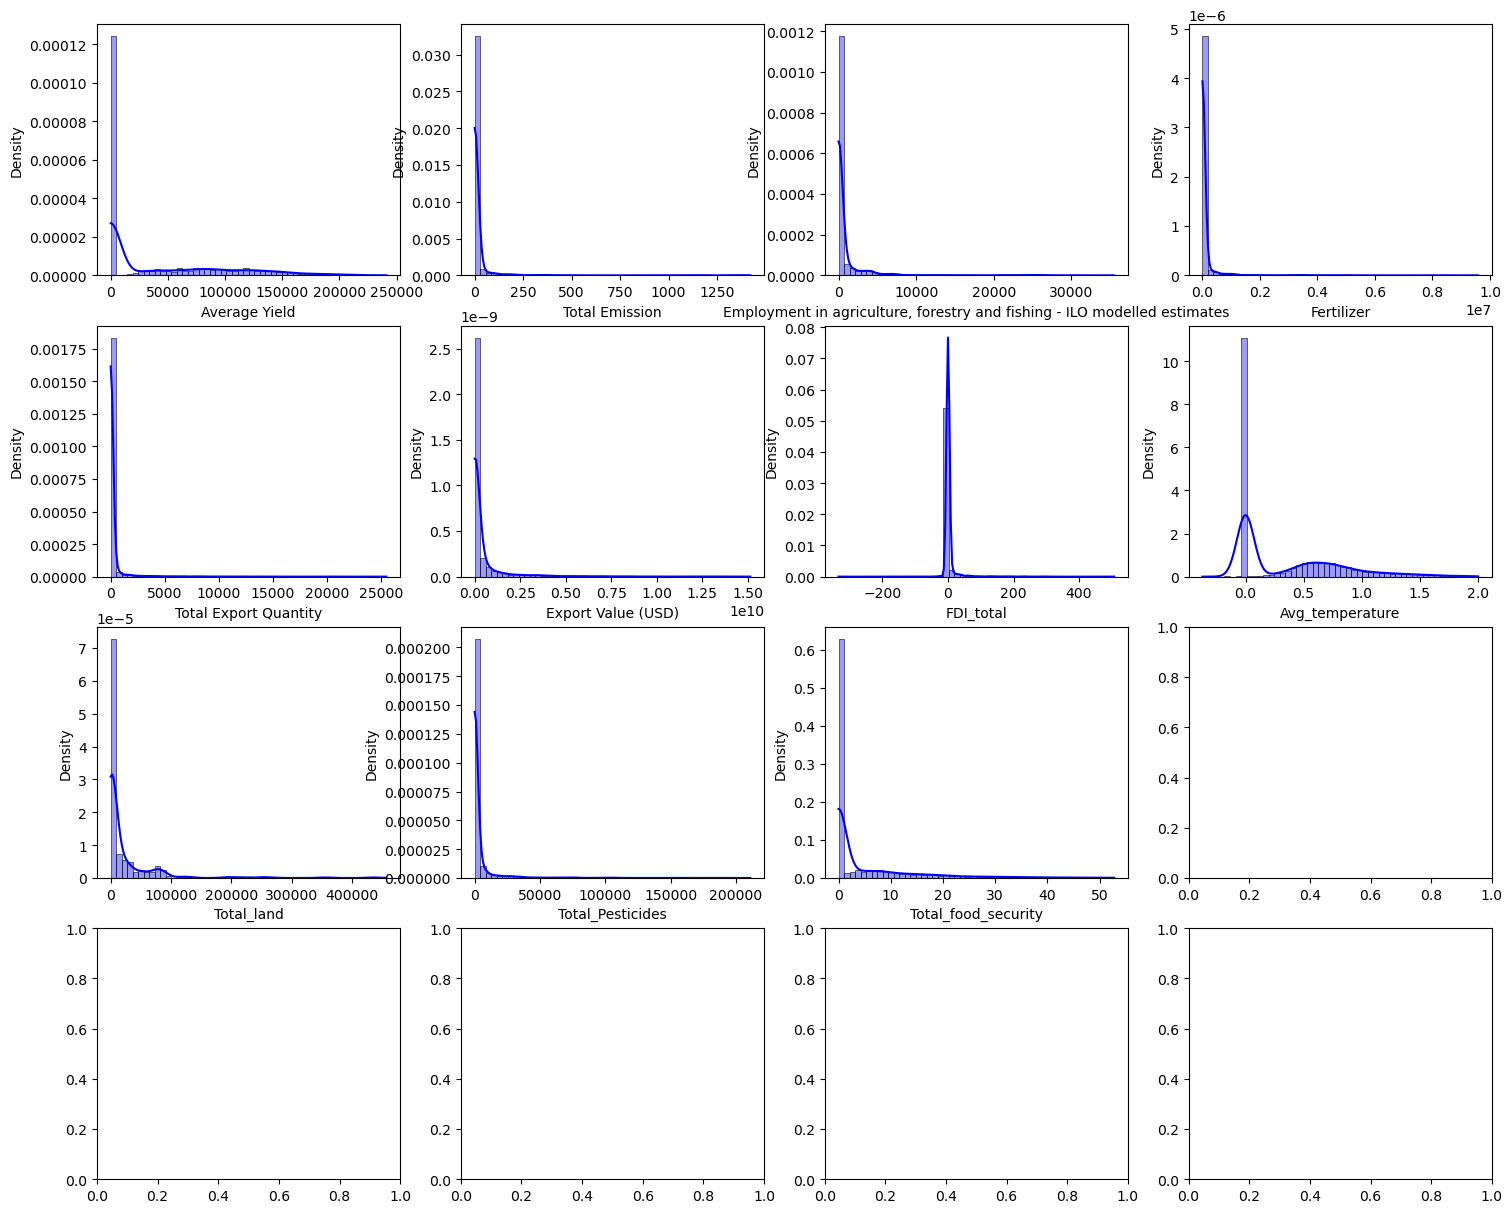

In [169]:
# Looking for Distribution of cols

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat': 'density',
    'bins':n_bins
}
cols=['Average Yield',
       'Total Emission', 'Employment in agriculture, forestry and fishing - ILO modelled estimates',
       'Fertilizer', 'Total Export Quantity', 'Export Value (USD)', 'FDI_total','Avg_temperature','Total_land',
       'Total_Pesticides','Total_food_security']
fig, ax = plt.subplots(4,4, figsize=(18, 15))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        cleaned_df[column], label='Train',
        ax=ax[i], color='blue', **histplot_hyperparams
    )

In [170]:
# t=sns.distplot(cleaned_df["Average Yield"],label="Skewness: %.2f"%(cleaned_df["Average Yield"].skew()) )
# t.legend()

In [171]:
# # after log-transform
# Log_Ave = cleaned_df["Average Yield"].map(lambda i: np.log(i) if i > 0 else 0)
# t=sns.distplot(Log_Ave,label="Skewness: %.2f"%(Log_Ave.skew()) )
# t.legend()

In [172]:
cleaned_df.dtypes

Year                                                                          int64
Area Code (M49)                                                               int64
Average Yield                                                               float64
Total Emission                                                              float64
Employment in agriculture, forestry and fishing - ILO modelled estimates    float64
Fertilizer                                                                  float64
Total Export Quantity                                                       float64
Export Value (USD)                                                          float64
FDI_total                                                                   float64
Avg_temperature                                                             float64
Total_land                                                                  float64
Total_Pesticides                                                            

In [173]:
# def create_lagged_features(df, lag=1):
#     lagged_df = df.copy()
#     for col in df.columns:
#         if col not in ['Year', 'Area Code (M49)']:
#             for i in range(1, lag+1):
#                 lagged_df[f'{col}_lag{i}'] = lagged_df[col].shift(i)
#     return lagged_df.dropna()

# cleaned_df = create_lagged_features(cleaned_df, lag=3)

In [174]:
df_skew = cleaned_df.copy()

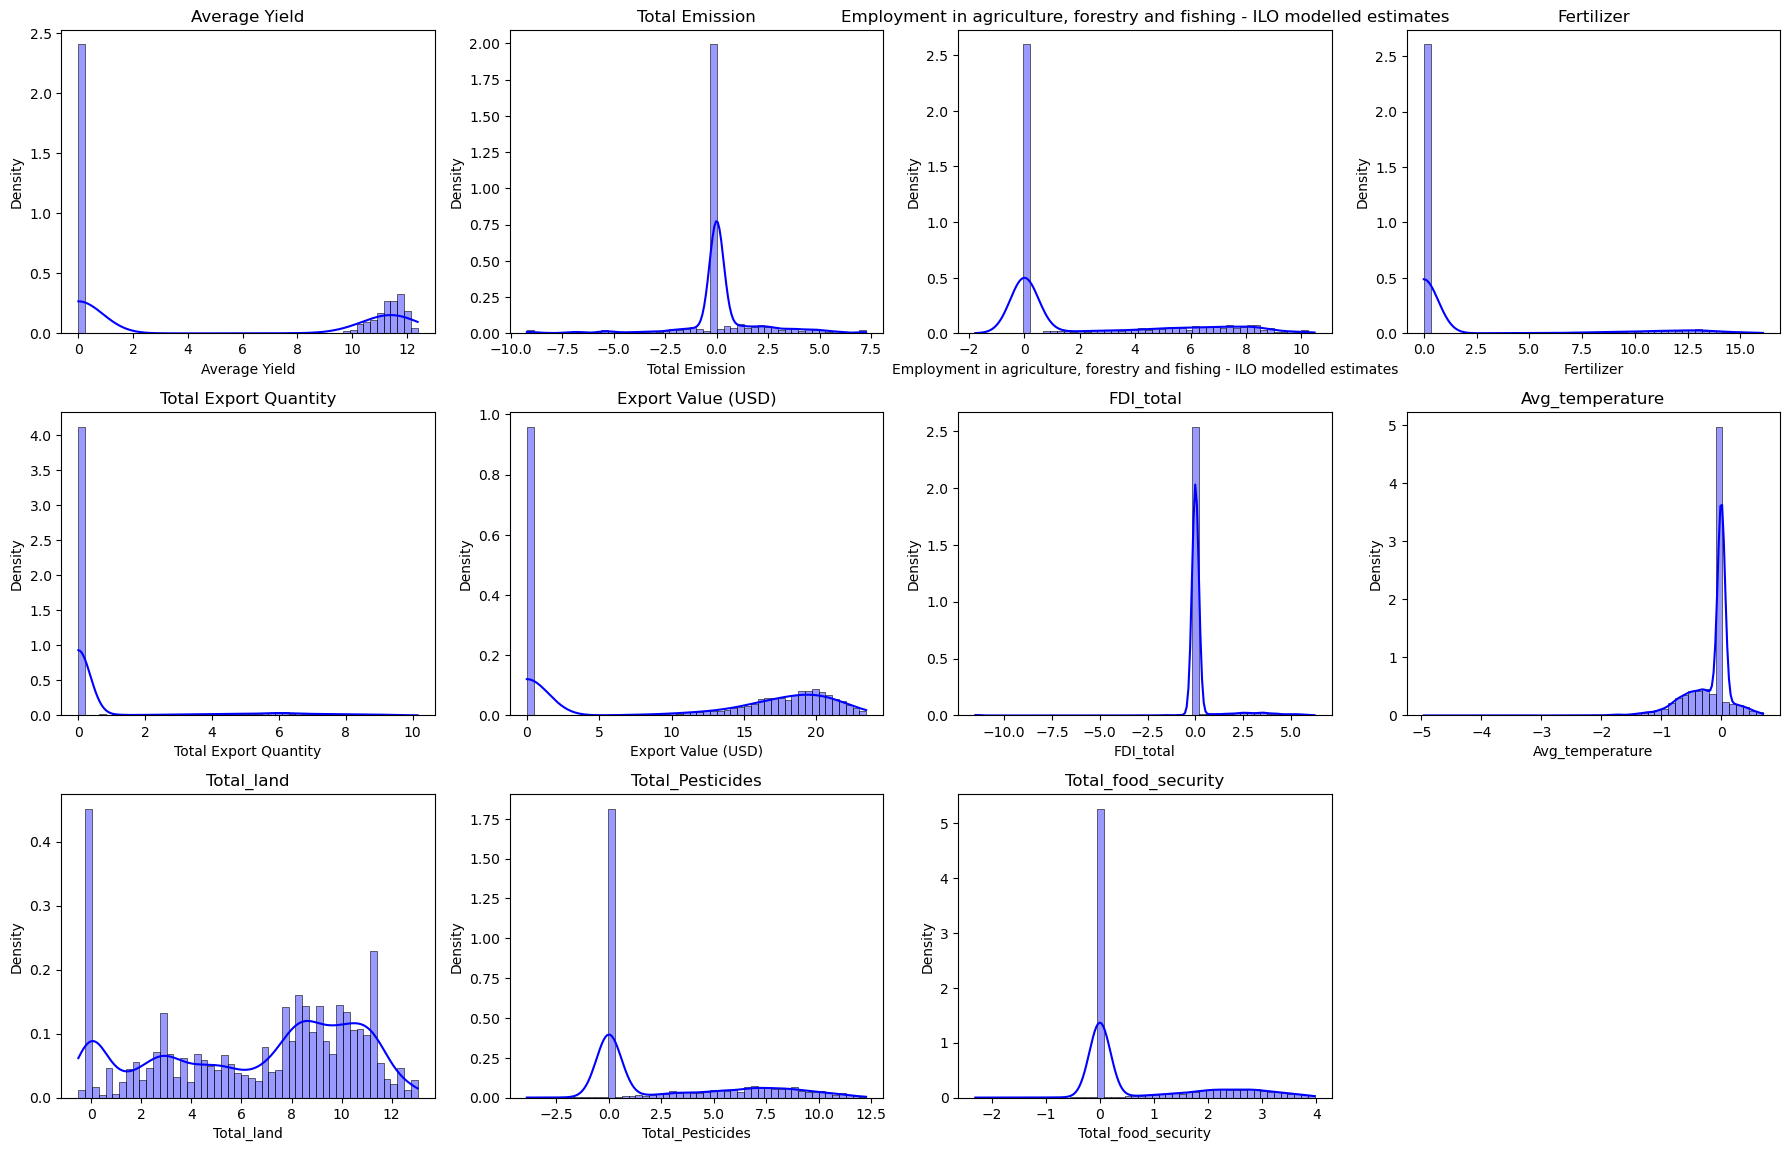

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_skew is your DataFrame



# Select only the float columns from the DataFrame
float_cols = df_skew.select_dtypes(include=['float64']).columns.intersection(cols)

# Apply log transformation to float columns
for col in float_cols:
    df_skew[col] = df_skew[col].map(lambda i: np.log(i) if i > 0 else 0)

# Define histogram hyperparameters
n_bins = 50
histplot_hyperparams = {
    'kde': True,
    'alpha': 0.4,
    'stat': 'density',
    'bins': n_bins
}

# Create subplots
fig, ax = plt.subplots(4, 4, figsize=(18, 15))
ax = ax.flatten()

# Plot histograms only for float columns
for i, column in enumerate(float_cols):
    sns.histplot(
        df_skew[column], label='Train',
        ax=ax[i], color='blue', **histplot_hyperparams
    )
    ax[i].set_title(column)

# Hide any empty subplots
for j in range(len(float_cols), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

    

In [176]:
df_skew.shape

(9474, 13)

In [177]:
# Calculate skewness for each column
skewness = df_skew.skew()
print("Original Skewness:")
print(skewness)

Original Skewness:
Year                                                                        0.014636
Area Code (M49)                                                             0.008466
Average Yield                                                               0.408264
Total Emission                                                             -0.770131
Employment in agriculture, forestry and fishing - ILO modelled estimates    1.052988
Fertilizer                                                                  2.058398
Total Export Quantity                                                       2.339891
Export Value (USD)                                                         -0.035791
FDI_total                                                                   0.227020
Avg_temperature                                                            -2.329192
Total_land                                                                 -0.394752
Total_Pesticides                              

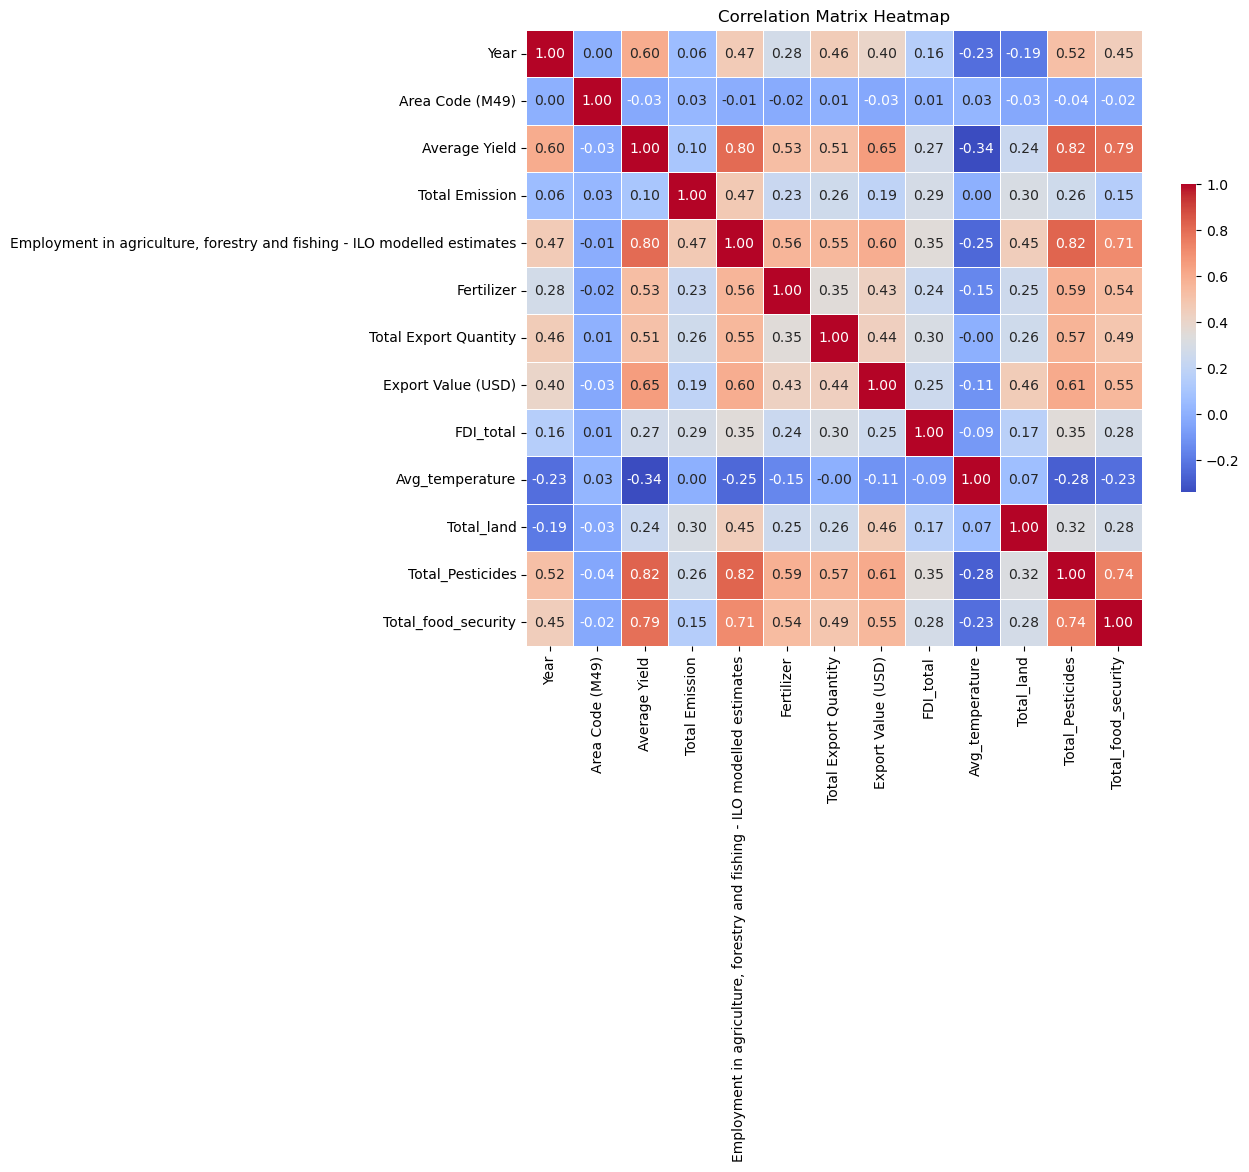

In [178]:
# Calculate the correlation matrix
corr_matrix = df_skew.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the size to fit your dataset

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [179]:
df_skew.drop(columns=['Avg_temperature'], inplace=True)

In [180]:
df_skew.head()

,Year,Area Code (M49),Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Total_land,Total_Pesticides,Total_food_security
0,2001,4,11.013720,2.994026,7.939351,0.0,0.0,17.115413,0.0,11.260997,0.000000,2.791165
1,2001,8,11.365987,-0.975510,6.301391,0.0,0.0,15.932489,0.0,7.731053,6.444275,2.208274
2,2001,12,10.745772,1.085257,7.275062,0.0,0.0,16.711864,0.0,11.292503,8.422832,2.660260
3,2001,20,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.817712,3.535845,0.000000
4,2001,24,11.146755,1.227211,7.842098,0.0,0.0,0.000000,0.0,11.394480,4.382027,2.066863


In [181]:
df_skew['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2000, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [182]:
# Assuming df_skew is your DataFrame
test_df = df_skew[(df_skew['Year'] > 2019) & (df_skew['Year'] <= 2022)]


test_df['Year'].unique()

array([2020, 2021, 2022])

In [183]:
test_df.shape

(608, 12)

In [184]:
#  # Define test years
# train_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015, 2016, 2017, 2018,2019,2020]

# # Filter the DataFrame for training and testing
# train_df = df_skew[df_skew['Year'].isin(train_years)]

# Filter the DataFrame for years greater than 2020 and less than or equal to 2023
train_df = df_skew[(df_skew['Year'] >= 2000) & (df_skew['Year'] <= 2019)]

train_df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2000])

In [185]:
train_df.shape

(4324, 12)

In [186]:
 test_df.head()

,Year,Area Code (M49),Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,Export Value (USD),FDI_total,Total_land,Total_Pesticides,Total_food_security
3841,2020,4,11.140070,3.252075,8.215226,0.000000,6.793466,20.360996,0.000000,11.278708,0.000000,2.151762
3842,2020,8,11.884561,-1.020263,6.041658,11.808591,5.105945,18.546878,-1.581847,7.899858,7.296888,2.001480
3843,2020,12,11.509918,1.241008,6.998628,0.000000,5.293305,20.015994,0.000000,11.322154,9.023711,2.014903
3844,2020,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.625796,3.214329,0.000000
3845,2020,24,11.380943,2.381757,8.911909,0.000000,3.496508,16.654033,0.000000,11.427193,4.382027,0.993252


In [187]:
test_df['Year'].unique()

array([2020, 2021, 2022])

In [188]:
train_df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2000])

In [189]:
# Assuming 'target' is the name of your target column
X = train_df.drop(columns=['Export Value (USD)'])
y = train_df['Export Value (USD)']

# Display the shapes of the training set
print("Training set shape (X_train, y_train):", X.shape, y.shape)

Training set shape (X_train, y_train): (4324, 11) (4324,)


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training and validation data into 75% training and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Display the shapes of the training, validation, and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2594, 11) (2594,)
Validation set shape (X_val, y_val): (865, 11) (865,)
Testing set shape (X_test, y_test): (865, 11) (865,)


In [192]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and testing data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training, validation, and testing sets
print("Scaled Training set shape (X_train_scaled):", X_train_scaled.shape)
print("Scaled Validation set shape (X_val_scaled):", X_val_scaled.shape)
print("Scaled Testing set shape (X_test_scaled):", X_test_scaled.shape)

Scaled Training set shape (X_train_scaled): (2594, 11)
Scaled Validation set shape (X_val_scaled): (865, 11)
Scaled Testing set shape (X_test_scaled): (865, 11)


In [193]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error

# # Initialize the MLPRegressor with L2 regularization
# mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 100), activation='relu', solver='adam', 
#                              alpha=0.001, batch_size=256, learning_rate='constant', 
#                              learning_rate_init=0.001, max_iter=5000, random_state=42)

# # Fit the MLPRegressor to the scaled training data
# mlp_regressor.fit(X_train_best, y_train)

# # Predict on the validation set
# y_val_pred = mlp_regressor.predict(X_val_best)

# # Evaluate the model using Mean Squared Error (MSE) on the validation set
# mse_val = mean_squared_error(y_val, y_val_pred)
# print("Mean Squared Error on Validation Set:", mse_val)

# # Predict on the test set
# y_test_pred = mlp_regressor.predict(X_test_best)

# # Clip the predictions to be non-negative
# y_test_pred = np.clip(y_test_pred, 0, None)

# # Evaluate the model using Mean Squared Error (MSE) on the test set
# mse_test_clipped = mean_squared_error(y_test, y_test_pred)
# print("Mean Squared Error on Test Set with Clipped Predictions:", mse_test_clipped)


In [194]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.layers import Dense, Dropout
# import numpy as np

# # Assuming X_train_best, y_train, X_val_best, y_val, X_test_best, and y_test are already defined and scaled

# # Define the neural network model
# model = Sequential([
#     Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     Dropout(0.2),
#     Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     Dropout(0.2),
#     Dense(1)  # Output layer
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Learning rate reduction callback
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=500, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=1)

# # Predict on the validation set
# y_val_pred = model.predict(X_val_scaled)
# mse_val = mean_squared_error(y_val, y_val_pred)
# print("Mean Squared Error on Validation Set:", mse_val)

# # Predict on the test set
# y_test_pred = model.predict(X_test_scaled)

# # Clip the predictions to be non-negative
# y_test_pred = np.clip(y_test_pred, 0, None)

# # Evaluate the model using Mean Squared Error (MSE) on the test set
# mse_test_clipped = mean_squared_error(y_test, y_test_pred)
# print("Mean Squared Error on Test Set with Clipped Predictions:", mse_test_clipped)


In [195]:
# Add necessary imports for TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the neural network model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
model.fit(X_train_scaled, y_train, epochs=500, batch_size=256, validation_data=(X_val_scaled, y_val), verbose=1)

# Predict on the validation set
y_val_pred = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_val)

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Clip the predictions to be non-negative
y_test_pred = np.clip(y_test_pred, 0, None)

# Evaluate the model using Mean Squared Error (MSE) on the test set
mse_test_clipped = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set with Clipped Predictions:", mse_test_clipped)

# Add the year and area code to the predictions
test_df_with_predictions = X_test.copy()
test_df_with_predictions['Predicted Export Value (USD)'] = y_test_pred
test_df_with_predictions['Actual Export Value (USD)'] = y_test

# Add the year and area code to the predictions
test_df_with_predictions = train_df[['Year', 'Area Code (M49)']].merge(test_df_with_predictions, left_index=True, right_index=True)




Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 229.8156 - val_loss: 207.3248
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 197.4355 - val_loss: 172.9959
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 160.8204 - val_loss: 132.3197
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 116.5046 - val_loss: 87.8881
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 75.8650 - val_loss: 50.3886
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 47.3779 - val_loss: 32.4591
Epoch 7/500
11/11 [==============================] - 0s 1ms/step - loss: 35.7291 - val_loss: 26.7024
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 31.7974 - val_loss: 22.0276
Epoch 9/500
11/11 [==============================] - 0s 1ms/step - loss: 26.6064 - val_loss: 19.0323
Epoch 10/500
11/11 [==============================] - 0s 1ms/step - loss: 25.4650 - 

Epoch 82/500
11/11 [==============================] - 0s 2ms/step - loss: 10.9724 - val_loss: 6.8759
Epoch 83/500
11/11 [==============================] - 0s 2ms/step - loss: 10.6515 - val_loss: 6.8122
Epoch 84/500
11/11 [==============================] - 0s 1ms/step - loss: 10.4711 - val_loss: 6.7570
Epoch 85/500
11/11 [==============================] - 0s 1ms/step - loss: 10.5776 - val_loss: 6.7041
Epoch 86/500
11/11 [==============================] - 0s 1ms/step - loss: 10.9076 - val_loss: 6.6917
Epoch 87/500
11/11 [==============================] - 0s 1ms/step - loss: 10.7455 - val_loss: 6.6296
Epoch 88/500
11/11 [==============================] - 0s 1ms/step - loss: 10.8570 - val_loss: 6.5805
Epoch 89/500
11/11 [==============================] - 0s 1ms/step - loss: 10.4729 - val_loss: 6.6290
Epoch 90/500
11/11 [==============================] - 0s 1ms/step - loss: 10.2042 - val_loss: 6.5965
Epoch 91/500
11/11 [==============================] - 0s 1ms/step - loss: 10.2942 - val_los

11/11 [==============================] - 0s 2ms/step - loss: 8.3334 - val_loss: 4.8675
Epoch 164/500
11/11 [==============================] - 0s 1ms/step - loss: 7.9401 - val_loss: 4.8189
Epoch 165/500
11/11 [==============================] - 0s 1ms/step - loss: 7.9611 - val_loss: 4.8559
Epoch 166/500
11/11 [==============================] - 0s 1ms/step - loss: 7.9906 - val_loss: 4.9242
Epoch 167/500
11/11 [==============================] - 0s 1ms/step - loss: 8.2300 - val_loss: 4.8747
Epoch 168/500
11/11 [==============================] - 0s 1ms/step - loss: 7.8341 - val_loss: 4.9158
Epoch 169/500
11/11 [==============================] - 0s 1ms/step - loss: 8.1660 - val_loss: 4.9005
Epoch 170/500
11/11 [==============================] - 0s 1ms/step - loss: 8.0571 - val_loss: 4.8366
Epoch 171/500
11/11 [==============================] - 0s 1ms/step - loss: 7.9440 - val_loss: 4.7619
Epoch 172/500
11/11 [==============================] - 0s 1ms/step - loss: 7.8003 - val_loss: 4.8612
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 6.7326 - val_loss: 4.4065
Epoch 245/500
11/11 [==============================] - 0s 1ms/step - loss: 6.9950 - val_loss: 4.3280
Epoch 246/500
11/11 [==============================] - 0s 1ms/step - loss: 7.0420 - val_loss: 4.3290
Epoch 247/500
11/11 [==============================] - 0s 1ms/step - loss: 6.7083 - val_loss: 4.3085
Epoch 248/500
11/11 [==============================] - 0s 1ms/step - loss: 7.0909 - val_loss: 4.3466
Epoch 249/500
11/11 [==============================] - 0s 1ms/step - loss: 6.7970 - val_loss: 4.3306
Epoch 250/500
11/11 [==============================] - 0s 2ms/step - loss: 6.8473 - val_loss: 4.3523
Epoch 251/500
11/11 [==============================] - 0s 1ms/step - loss: 6.6321 - val_loss: 4.3316
Epoch 252/500
11/11 [==============================] - 0s 1ms/step - loss: 6.5549 - val_loss: 4.3078
Epoch 253/500
11/11 [==============================] - 0s 1ms/step - loss: 6.7664 - val_loss: 4.3096
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 6.0140 - val_loss: 4.0480
Epoch 326/500
11/11 [==============================] - 0s 1ms/step - loss: 5.6126 - val_loss: 4.2000
Epoch 327/500
11/11 [==============================] - 0s 1ms/step - loss: 5.9146 - val_loss: 4.0631
Epoch 328/500
11/11 [==============================] - 0s 1ms/step - loss: 5.9826 - val_loss: 4.0474
Epoch 329/500
11/11 [==============================] - 0s 1ms/step - loss: 6.0399 - val_loss: 4.1553
Epoch 330/500
11/11 [==============================] - 0s 1ms/step - loss: 5.9043 - val_loss: 4.0627
Epoch 331/500
11/11 [==============================] - 0s 1ms/step - loss: 5.9326 - val_loss: 4.0731
Epoch 332/500
11/11 [==============================] - 0s 1ms/step - loss: 6.1658 - val_loss: 3.9986
Epoch 333/500
11/11 [==============================] - 0s 1ms/step - loss: 5.9814 - val_loss: 4.1610
Epoch 334/500
11/11 [==============================] - 0s 1ms/step - loss: 5.8284 - val_loss: 4.0371
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 5.6467 - val_loss: 3.8498
Epoch 407/500
11/11 [==============================] - 0s 1ms/step - loss: 5.4892 - val_loss: 3.8992
Epoch 408/500
11/11 [==============================] - 0s 1ms/step - loss: 5.6263 - val_loss: 3.8781
Epoch 409/500
11/11 [==============================] - 0s 1ms/step - loss: 5.4200 - val_loss: 4.0802
Epoch 410/500
11/11 [==============================] - 0s 1ms/step - loss: 5.5776 - val_loss: 3.8211
Epoch 411/500
11/11 [==============================] - 0s 1ms/step - loss: 5.6489 - val_loss: 3.8871
Epoch 412/500
11/11 [==============================] - 0s 1ms/step - loss: 5.5028 - val_loss: 3.8363
Epoch 413/500
11/11 [==============================] - 0s 1ms/step - loss: 5.4820 - val_loss: 3.8842
Epoch 414/500
11/11 [==============================] - 0s 1ms/step - loss: 5.4621 - val_loss: 3.9039
Epoch 415/500
11/11 [==============================] - 0s 1ms/step - loss: 5.4127 - val_loss: 3.8063
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 5.2774 - val_loss: 3.6845
Epoch 488/500
11/11 [==============================] - 0s 1ms/step - loss: 5.3304 - val_loss: 3.6557
Epoch 489/500
11/11 [==============================] - 0s 1ms/step - loss: 5.0593 - val_loss: 3.5810
Epoch 490/500
11/11 [==============================] - 0s 1ms/step - loss: 5.1291 - val_loss: 3.6453
Epoch 491/500
11/11 [==============================] - 0s 1ms/step - loss: 5.0465 - val_loss: 3.6498
Epoch 492/500
11/11 [==============================] - 0s 1ms/step - loss: 5.1262 - val_loss: 3.5345
Epoch 493/500
11/11 [==============================] - 0s 1ms/step - loss: 4.9888 - val_loss: 3.5438
Epoch 494/500
11/11 [==============================] - 0s 1ms/step - loss: 5.0386 - val_loss: 3.6407
Epoch 495/500
11/11 [==============================] - 0s 1ms/step - loss: 5.0206 - val_loss: 3.6233
Epoch 496/500
11/11 [==============================] - 0s 1ms/step - loss: 5.1518 - val_loss: 3.5998
Epoc

In [196]:
# Display the first few rows of the DataFrame with predictions
test_df_with_predictions.head(10)

,Year_x,Area Code (M49)_x,Year_y,Area Code (M49)_y,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,FDI_total,Total_land,Total_Pesticides,Total_food_security,Predicted Export Value (USD),Actual Export Value (USD)
8,2001,51,2001,51,11.267150,-1.414694,6.388023,0.0,0.0,-1.609438,7.884577,5.064872,2.879198,15.149408,15.923175
13,2001,44,2001,44,11.718266,-5.167289,1.922788,0.0,0.0,0.000000,3.091042,7.120024,2.694627,16.887463,16.204732
15,2001,50,2001,50,11.209308,6.991287,10.206110,0.0,0.0,0.058269,9.841931,8.805327,2.001480,18.420122,16.629001
20,2001,204,2001,204,11.086619,1.019605,7.273551,0.0,0.0,0.000000,8.784162,7.283187,2.116256,17.188654,17.165380
27,2001,92,2001,92,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.639057,3.717224,0.000000,0.806218,0.000000
31,2001,108,2001,108,11.482457,0.602456,7.815768,0.0,0.0,0.000000,8.216628,4.977561,1.987874,14.476135,14.514143
34,2001,120,2001,120,10.791916,1.072097,8.356141,0.0,0.0,0.000000,9.815749,7.225482,1.757858,16.097754,17.904575
38,2001,152,2001,152,11.858255,2.050682,6.642565,0.0,0.0,5.530662,10.318903,9.094371,2.833213,20.203489,21.315109
39,2001,344,2001,344,11.638626,0.000000,2.051556,0.0,0.0,0.000000,2.639057,4.663522,0.095310,16.543015,20.967119
51,2001,384,2001,384,11.352482,2.492941,7.994653,0.0,0.0,0.000000,10.576432,5.226392,2.322388,13.861119,19.657995


In [197]:
# test_df_copy = test_df.copy()

In [198]:
# Prepare the test_df by dropping the 'Export Value (USD)' column
X_test_df = test_df.drop(columns=['Export Value (USD)'])

In [199]:
X_test_df.head()

,Year,Area Code (M49),Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,FDI_total,Total_land,Total_Pesticides,Total_food_security
3841,2020,4,11.140070,3.252075,8.215226,0.000000,6.793466,0.000000,11.278708,0.000000,2.151762
3842,2020,8,11.884561,-1.020263,6.041658,11.808591,5.105945,-1.581847,7.899858,7.296888,2.001480
3843,2020,12,11.509918,1.241008,6.998628,0.000000,5.293305,0.000000,11.322154,9.023711,2.014903
3844,2020,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.625796,3.214329,0.000000
3845,2020,24,11.380943,2.381757,8.911909,0.000000,3.496508,0.000000,11.427193,4.382027,0.993252


In [200]:
# Scale the test_df using the same scaler used for training
X_test_df_scaled = scaler.transform(X_test_df)

In [201]:
#  Predict on the prepared test data
y_test_df_pred = model.predict(X_test_df_scaled)

19/19 [==============================] - 0s 279us/step


In [202]:
# Clip the predictions to be non-negative
y_test_df_pred = np.clip(y_test_df_pred, 0, None)

In [203]:
# Add the year and area code to the predictions
test_df_with_predictions = X_test_df.copy()
test_df_with_predictions['Predicted Export Value (USD)'] = y_test_df_pred
test_df_with_predictions['Actual Export Value (USD)'] = test_df['Export Value (USD)'].values

In [204]:
 mean_squared_error(test_df['Export Value (USD)'].values, y_test_df_pred)

8.91629393110493

In [205]:
# Add the year and area code to the predictions
test_df_with_predictions = test_df[['Year', 'Area Code (M49)']].merge(test_df_with_predictions, left_index=True, right_index=True)

# Display the first few rows of the DataFrame with predictions
test_df_with_predictions.head(10)

,Year_x,Area Code (M49)_x,Year_y,Area Code (M49)_y,Average Yield,Total Emission,"Employment in agriculture, forestry and fishing - ILO modelled estimates",Fertilizer,Total Export Quantity,FDI_total,Total_land,Total_Pesticides,Total_food_security,Predicted Export Value (USD),Actual Export Value (USD)
3841,2020,4,2020,4,11.140070,3.252075,8.215226,0.000000,6.793466,0.000000,11.278708,0.000000,2.151762,18.870077,20.360996
3842,2020,8,2020,8,11.884561,-1.020263,6.041658,11.808591,5.105945,-1.581847,7.899858,7.296888,2.001480,18.546564,18.546878
3843,2020,12,2020,12,11.509918,1.241008,6.998628,0.000000,5.293305,0.000000,11.322154,9.023711,2.014903,18.339806,20.015994
3844,2020,20,2020,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.625796,3.214329,0.000000,0.451149,0.000000
3845,2020,24,2020,24,11.380943,2.381757,8.911909,0.000000,3.496508,0.000000,11.427193,4.382027,0.993252,14.798993,16.654033
3846,2020,660,2020,660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.847489,0.000000,1.354891,0.000000
3847,2020,28,2020,28,10.292828,0.000000,0.000000,0.000000,2.079442,0.000000,2.890372,6.063320,0.875469,14.367823,12.015396
3850,2020,533,2020,533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,6.785328,0.000000,4.434087,0.000000
3854,2020,44,2020,44,11.629539,-5.339139,1.862529,0.000000,0.000000,0.000000,3.258097,5.832967,0.000000,13.695227,11.685617
3855,2020,48,2020,48,12.121249,0.000000,2.090629,0.000000,5.003946,0.000000,2.850707,3.181920,2.186051,19.535475,19.303233


In [206]:
test_df_with_predictions['Year_x'].unique()

array([2020, 2021, 2022])

In [207]:
test_df_with_predictions.columns

Index(['Year_x', 'Area Code (M49)_x', 'Year_y', 'Area Code (M49)_y',
       'Average Yield', 'Total Emission',
       'Employment in agriculture, forestry and fishing - ILO modelled estimates',
       'Fertilizer', 'Total Export Quantity', 'FDI_total', 'Total_land',
       'Total_Pesticides', 'Total_food_security',
       'Predicted Export Value (USD)', 'Actual Export Value (USD)'],
      dtype='object')

In [208]:
# Filter the DataFrame to include only the specified columns
filtered_test_df = test_df_with_predictions[['Year_x', 'Area Code (M49)_x', 'Predicted Export Value (USD)', 'Actual Export Value (USD)']]

# Rename the columns by removing the '_x' suffix
filtered_test_df = filtered_test_df.rename(columns={
    'Year_x': 'Year',
    'Area Code (M49)_x': 'Area Code (M49)'
})

In [209]:
filtered_test_df

,Year,Area Code (M49),Predicted Export Value (USD),Actual Export Value (USD)
3841,2020,4,18.870077,20.360996
3842,2020,8,18.546564,18.546878
3843,2020,12,18.339806,20.015994
3844,2020,20,0.451149,0.000000
3845,2020,24,14.798993,16.654033
...,...,...,...,...
10313,2021,831,0.209056,0.000000
10314,2022,831,0.172615,0.000000
10355,2020,832,0.236274,0.000000
10356,2021,832,0.208577,0.000000


In [210]:
filtered_test_df.columns

Index(['Year', 'Area Code (M49)', 'Predicted Export Value (USD)',
       'Actual Export Value (USD)'],
      dtype='object')

In [211]:
# Assuming your DataFrame is named 'food_trade_df'
filtered_df = food_trade_df[['Area', 'Area Code (M49)']]

filtered_df.head()

,Area,Area Code (M49)
0,Afghanistan,4
1,Afghanistan,4
2,Afghanistan,4
3,Afghanistan,4
4,Afghanistan,4


In [212]:
unique_areas_count = len(filtered_df['Area'].unique())
print(unique_areas_count)

203


In [213]:
filtered_df = filtered_df.drop_duplicates()

In [214]:
# Merging the DataFrames
merged_df = pd.merge(filtered_df, filtered_test_df, on='Area Code (M49)')

merged_df.head()

,Area,Area Code (M49),Year,Predicted Export Value (USD),Actual Export Value (USD)
0,Afghanistan,4,2020,18.870077,20.360996
1,Afghanistan,4,2021,15.651678,20.400176
2,Afghanistan,4,2022,13.664772,20.100166
3,Albania,8,2020,18.546564,18.546878
4,Albania,8,2021,17.042055,18.539220


In [215]:
merged_df.isnull().sum()

Area                            0
Area Code (M49)                 0
Year                            0
Predicted Export Value (USD)    0
Actual Export Value (USD)       0
dtype: int64

In [216]:
merged_df['Area-Year'] = merged_df['Area'] + '-' + merged_df['Year'].astype(str)

In [217]:
merged_df.head()

,Area,Area Code (M49),Year,Predicted Export Value (USD),Actual Export Value (USD),Area-Year
0,Afghanistan,4,2020,18.870077,20.360996,Afghanistan-2020
1,Afghanistan,4,2021,15.651678,20.400176,Afghanistan-2021
2,Afghanistan,4,2022,13.664772,20.100166,Afghanistan-2022
3,Albania,8,2020,18.546564,18.546878,Albania-2020
4,Albania,8,2021,17.042055,18.539220,Albania-2021


In [218]:
merged_df.columns

Index(['Area', 'Area Code (M49)', 'Year', 'Predicted Export Value (USD)',
       'Actual Export Value (USD)', 'Area-Year'],
      dtype='object')

In [219]:
# Drop the redundant columns 'Year_y' and 'Area_y'
merged_df = merged_df.drop(columns=['Area', 'Area Code (M49)','Year'])

In [220]:
merged_df.head()

,Predicted Export Value (USD),Actual Export Value (USD),Area-Year
0,18.870077,20.360996,Afghanistan-2020
1,15.651678,20.400176,Afghanistan-2021
2,13.664772,20.100166,Afghanistan-2022
3,18.546564,18.546878,Albania-2020
4,17.042055,18.539220,Albania-2021


In [221]:
# Move the last column 'Area-Year' to the first position
last_column = merged_df.pop('Area-Year')
merged_df.insert(0, 'Area-Year', last_column)

In [222]:
merged_df.head()

,Area-Year,Predicted Export Value (USD),Actual Export Value (USD)
0,Afghanistan-2020,18.870077,20.360996
1,Afghanistan-2021,15.651678,20.400176
2,Afghanistan-2022,13.664772,20.100166
3,Albania-2020,18.546564,18.546878
4,Albania-2021,17.042055,18.539220


In [223]:
# Export the DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

In [224]:
merged_df.shape

(455, 3)